In [62]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cbook
from matplotlib.colors import LightSource

# !!!
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
# Make data
def sun(N = 100, R=30):
  # parametric
    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(0, np.pi, N//10)
    x = R * np.outer(np.cos(u), np.sin(v))
    y = R * np.outer(np.sin(u), np.sin(v))
    z = R * np.outer(np.ones(np.size(u)), np.cos(v))
    return x,y,z
def earth(N = 100, R=10):
  # parametric
    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(0, np.pi, N//10)
    x = R * np.outer(np.cos(u), np.sin(v))
    y = R * np.outer(np.sin(u), np.sin(v))
    z = R * np.outer(np.ones(np.size(u)), np.cos(v))
    return x,y,z
def moon(N = 100, R=3):
  # parametric
    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(0, np.pi, N//10)
    x = R * np.outer(np.cos(u), np.sin(v))
    y = R * np.outer(np.sin(u), np.sin(v))
    z = R * np.outer(np.ones(np.size(u)), np.cos(v))
    return x,y,z



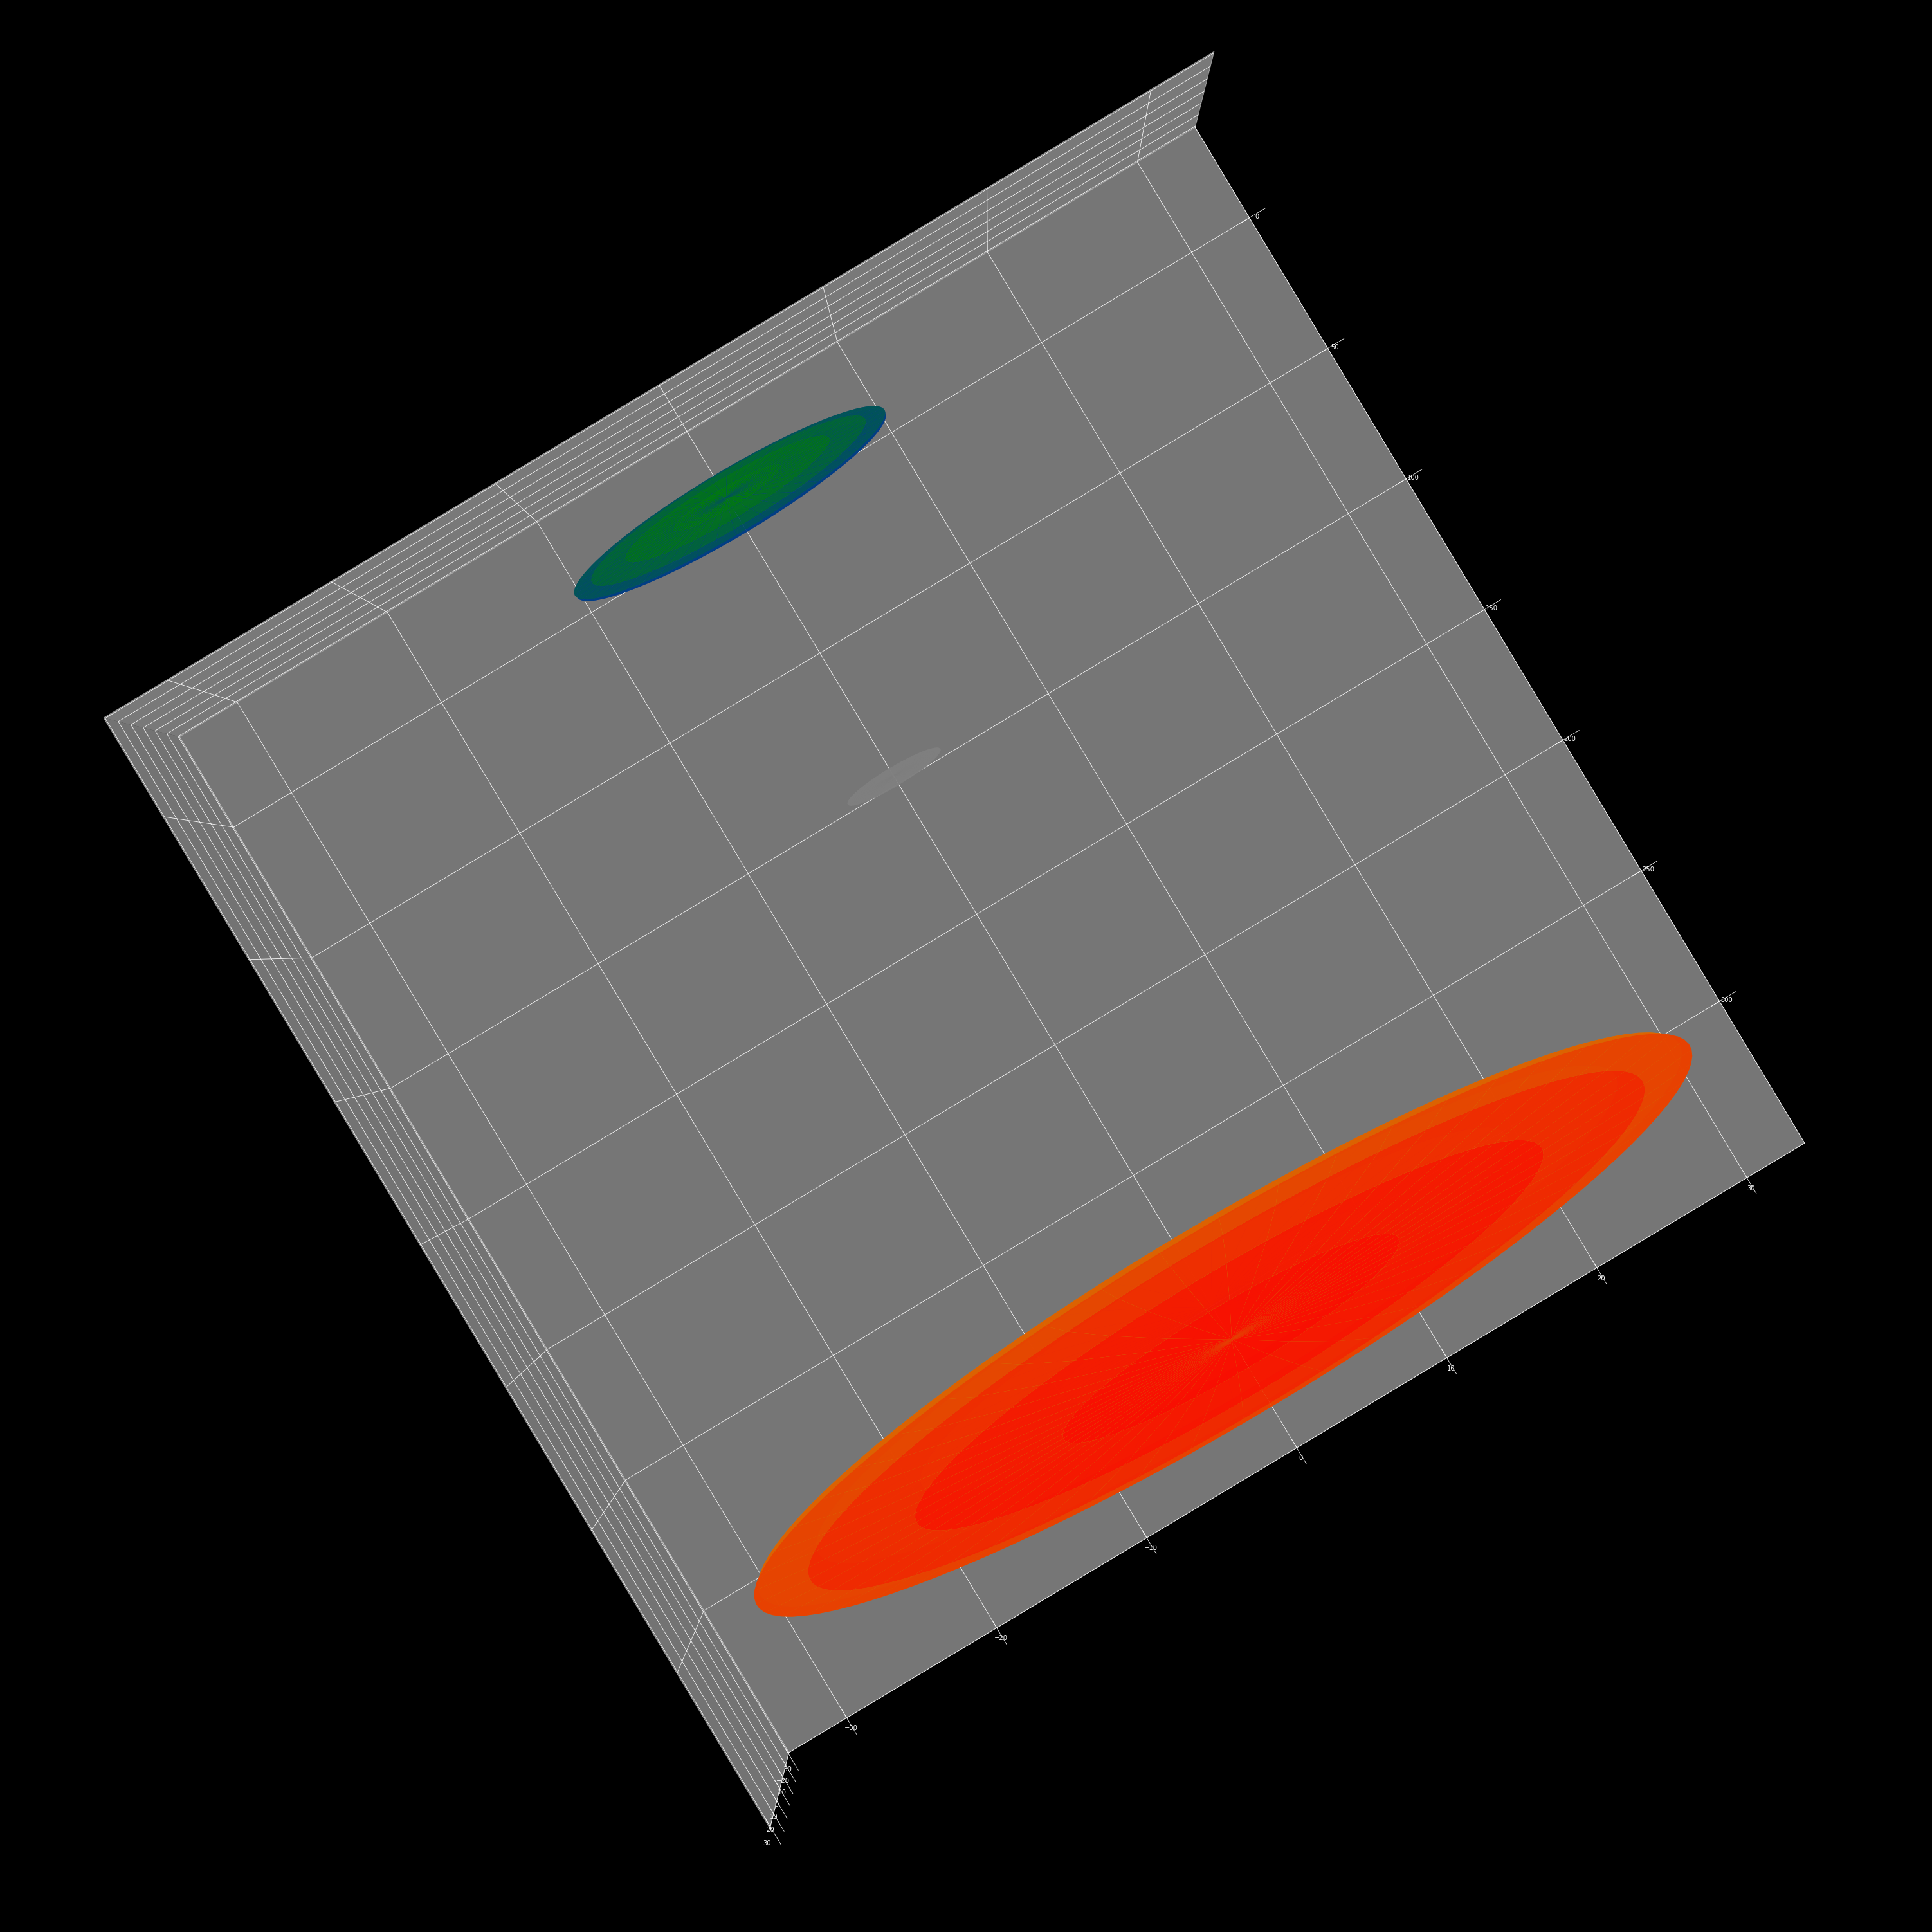

In [63]:
x1,y1,z1 = sun()  
x2,y2,z2 = earth()
x3,y3,z3 = moon()
fig = plt.figure(figsize = (55,55))
axes = fig.add_subplot(projection='3d')

# axes.plot_surface(x1+500, y1, z1, alpha=1, )# цвет+прозрачность alpha = 1 (не прозрачно)

# axes.plot_surface(x2, y2, z2, color='g', alpha = 0.45)# цвет+прозрачность alpha = 0.45
# Plot the surface
# axes.plot_surface(x1, y1, z1)
# axes.plot_surface(x2, y2, z2)

cmap = LinearSegmentedColormap.from_list ('yellow', ['y', 'r'], 256) #градиентная палитра цвета 256 level
axes.plot_surface(x1+300, y1, z1, color='#11aa55', cmap=cmap, alpha = 0.9) # цвет градиент, но почти нет прозрачности alpha = 0.9

cmap = LinearSegmentedColormap.from_list ('blue_green', ['b', 'g'], 256) #градиентная палитра цвета 256 level
axes.plot_surface(x2, y2, z2, color='#11aa55', cmap=cmap, alpha = 0.9) # цвет градиент, но почти нет прозрачности alpha = 0.9

cmap = LinearSegmentedColormap.from_list ('gray', ['gray', 'gray'], 256) #градиентная палитра цвета 256 level
axes.plot_surface(x3+100, y3, z3, color='#11aa55', cmap=cmap, alpha = 0.9) # цвет градиент, но почти нет прозрачности alpha = 0.9

axes.view_init( 90, -30) # точка зрения

# if 1: #  свет
#   ls = LightSource(azdeg=10, altdeg=-145)
#   rgb = ls.shade(x2,cmap =cmap,  vert_exag=1, blend_mode='hsv') # hsv
#   axes.plot_surface(x1, y1, z1, rstride=1, cstride=1, facecolors=rgb,
#                            linewidth=0, antialiased=True, shade=True)

# if 1:


#     fig = plt.figure(figsize=(10, 8))
#     axes_shade = fig.add_subplot(1, 2, 1, projection='3d')
#     axes_no_shade = fig.add_subplot(1, 2, 2, projection='3d')

#     axes_shade.plot_surface(x, y, z, rcount=40, ccount=40, shade=True)
#     axes_shade.set_title("shade=True (default)")

#     axes_no_shade.plot_surface(x, y, z, rcount=40, ccount=40, shade=False)
#     axes_no_shade.set_title("shade=False")

plt.show()

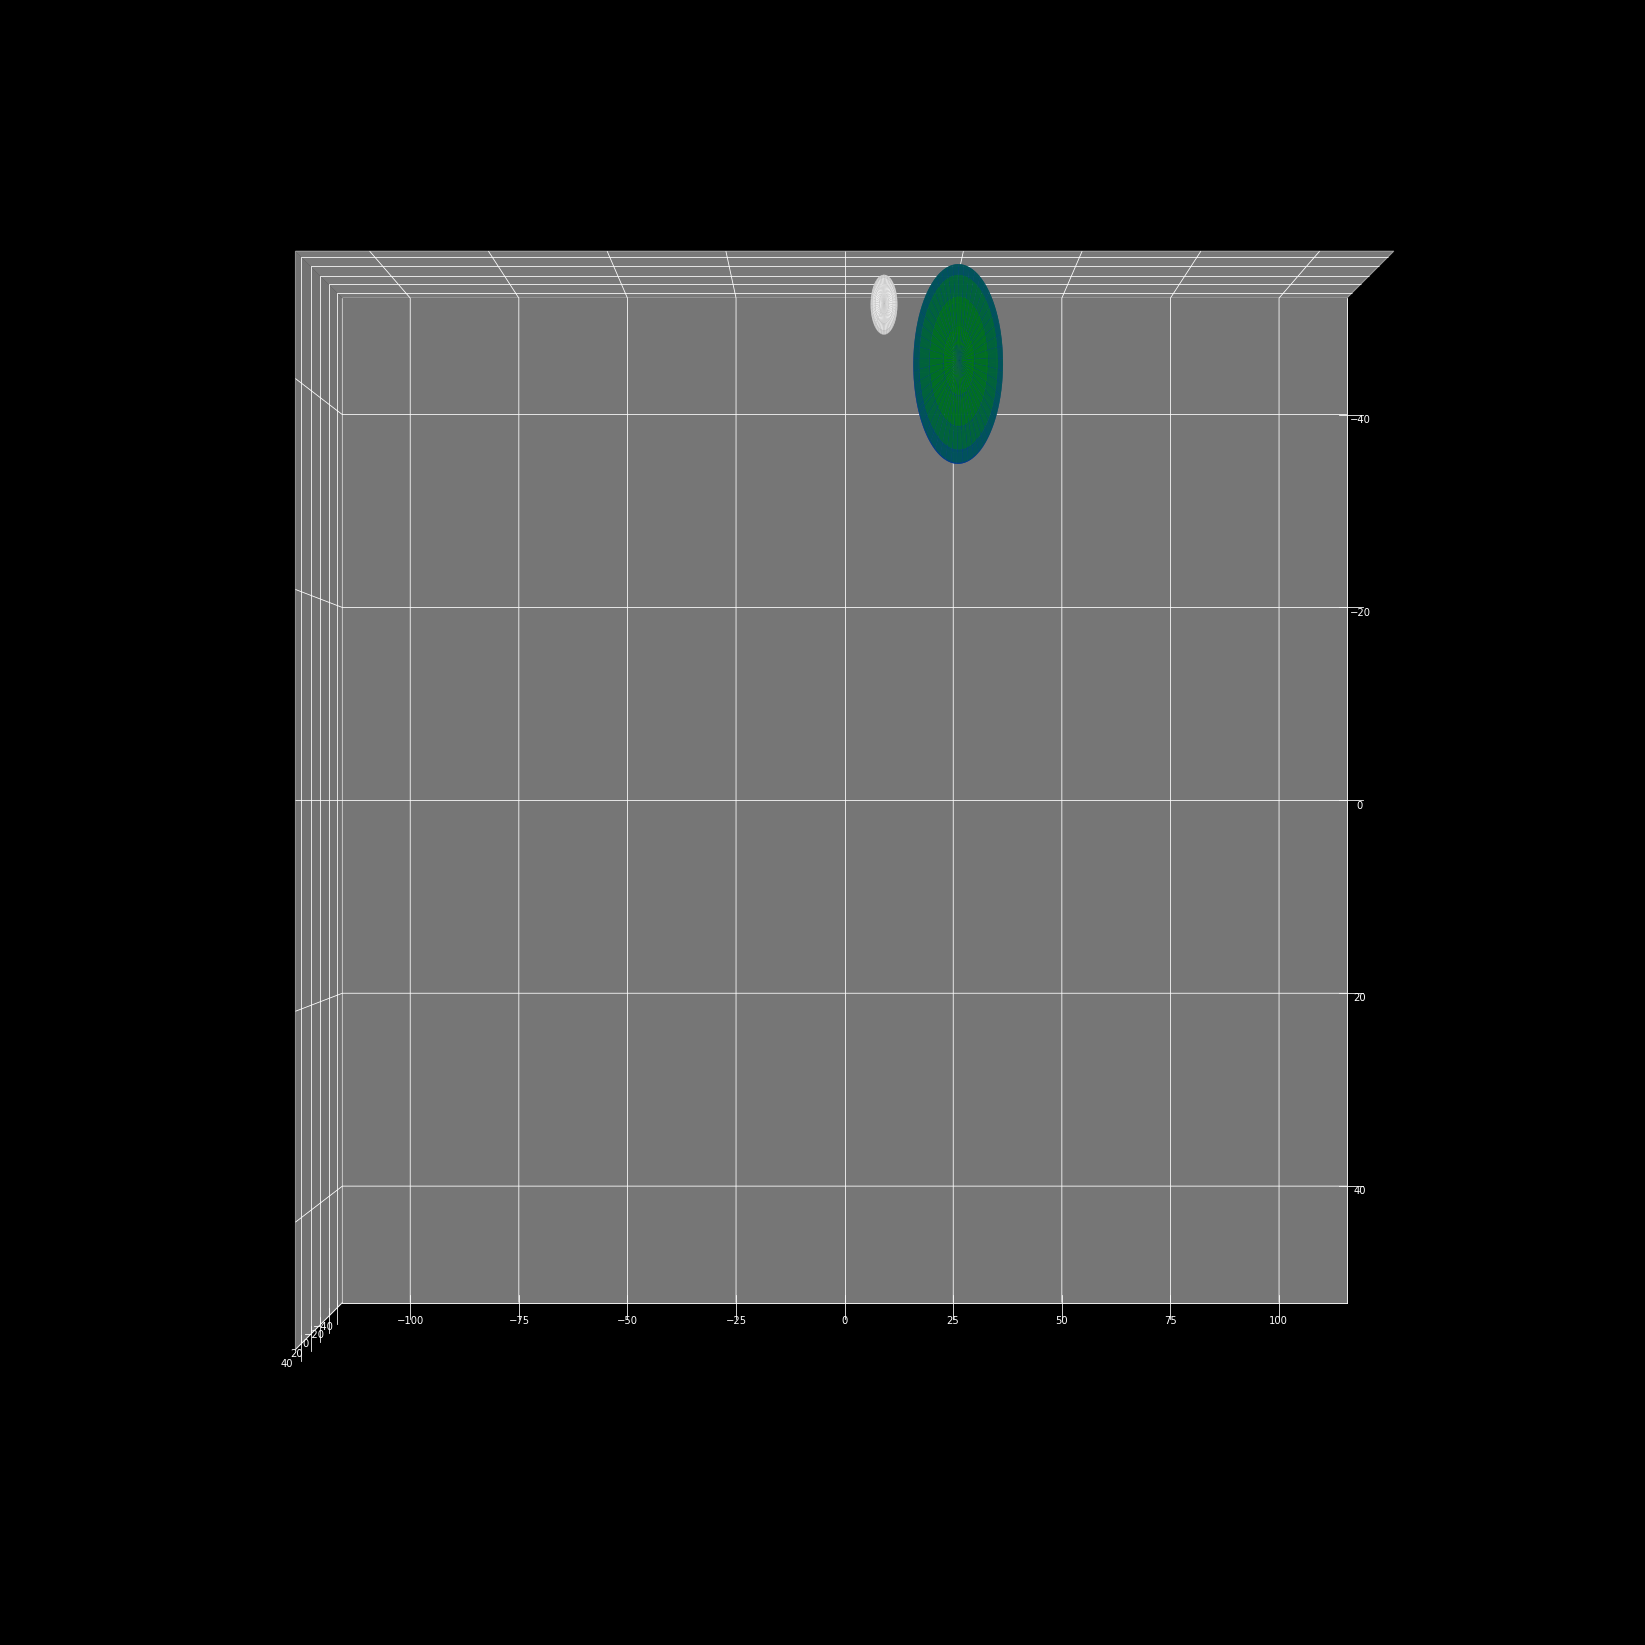

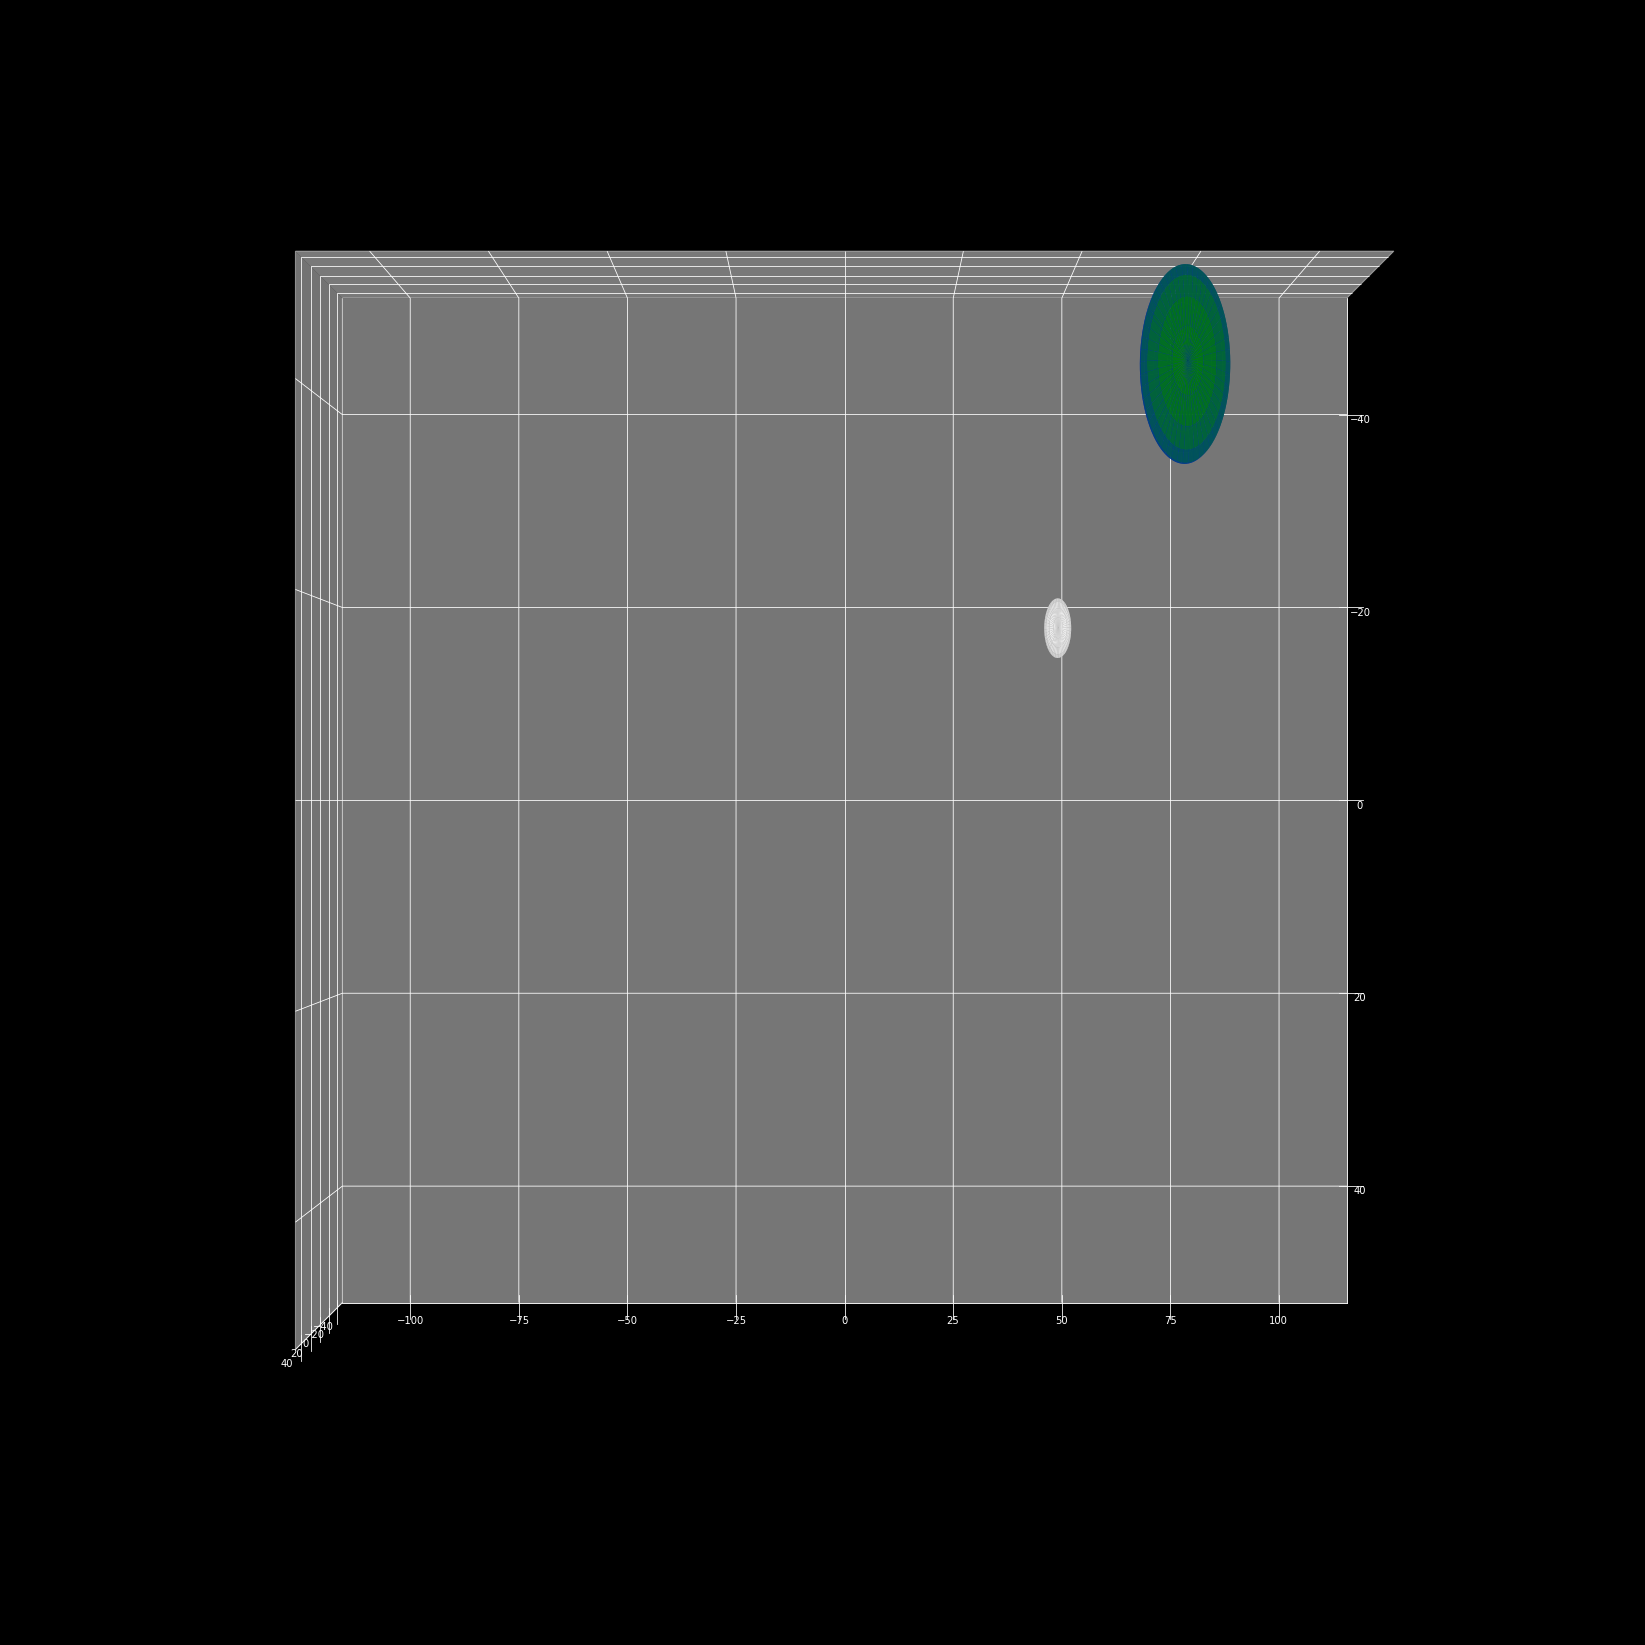

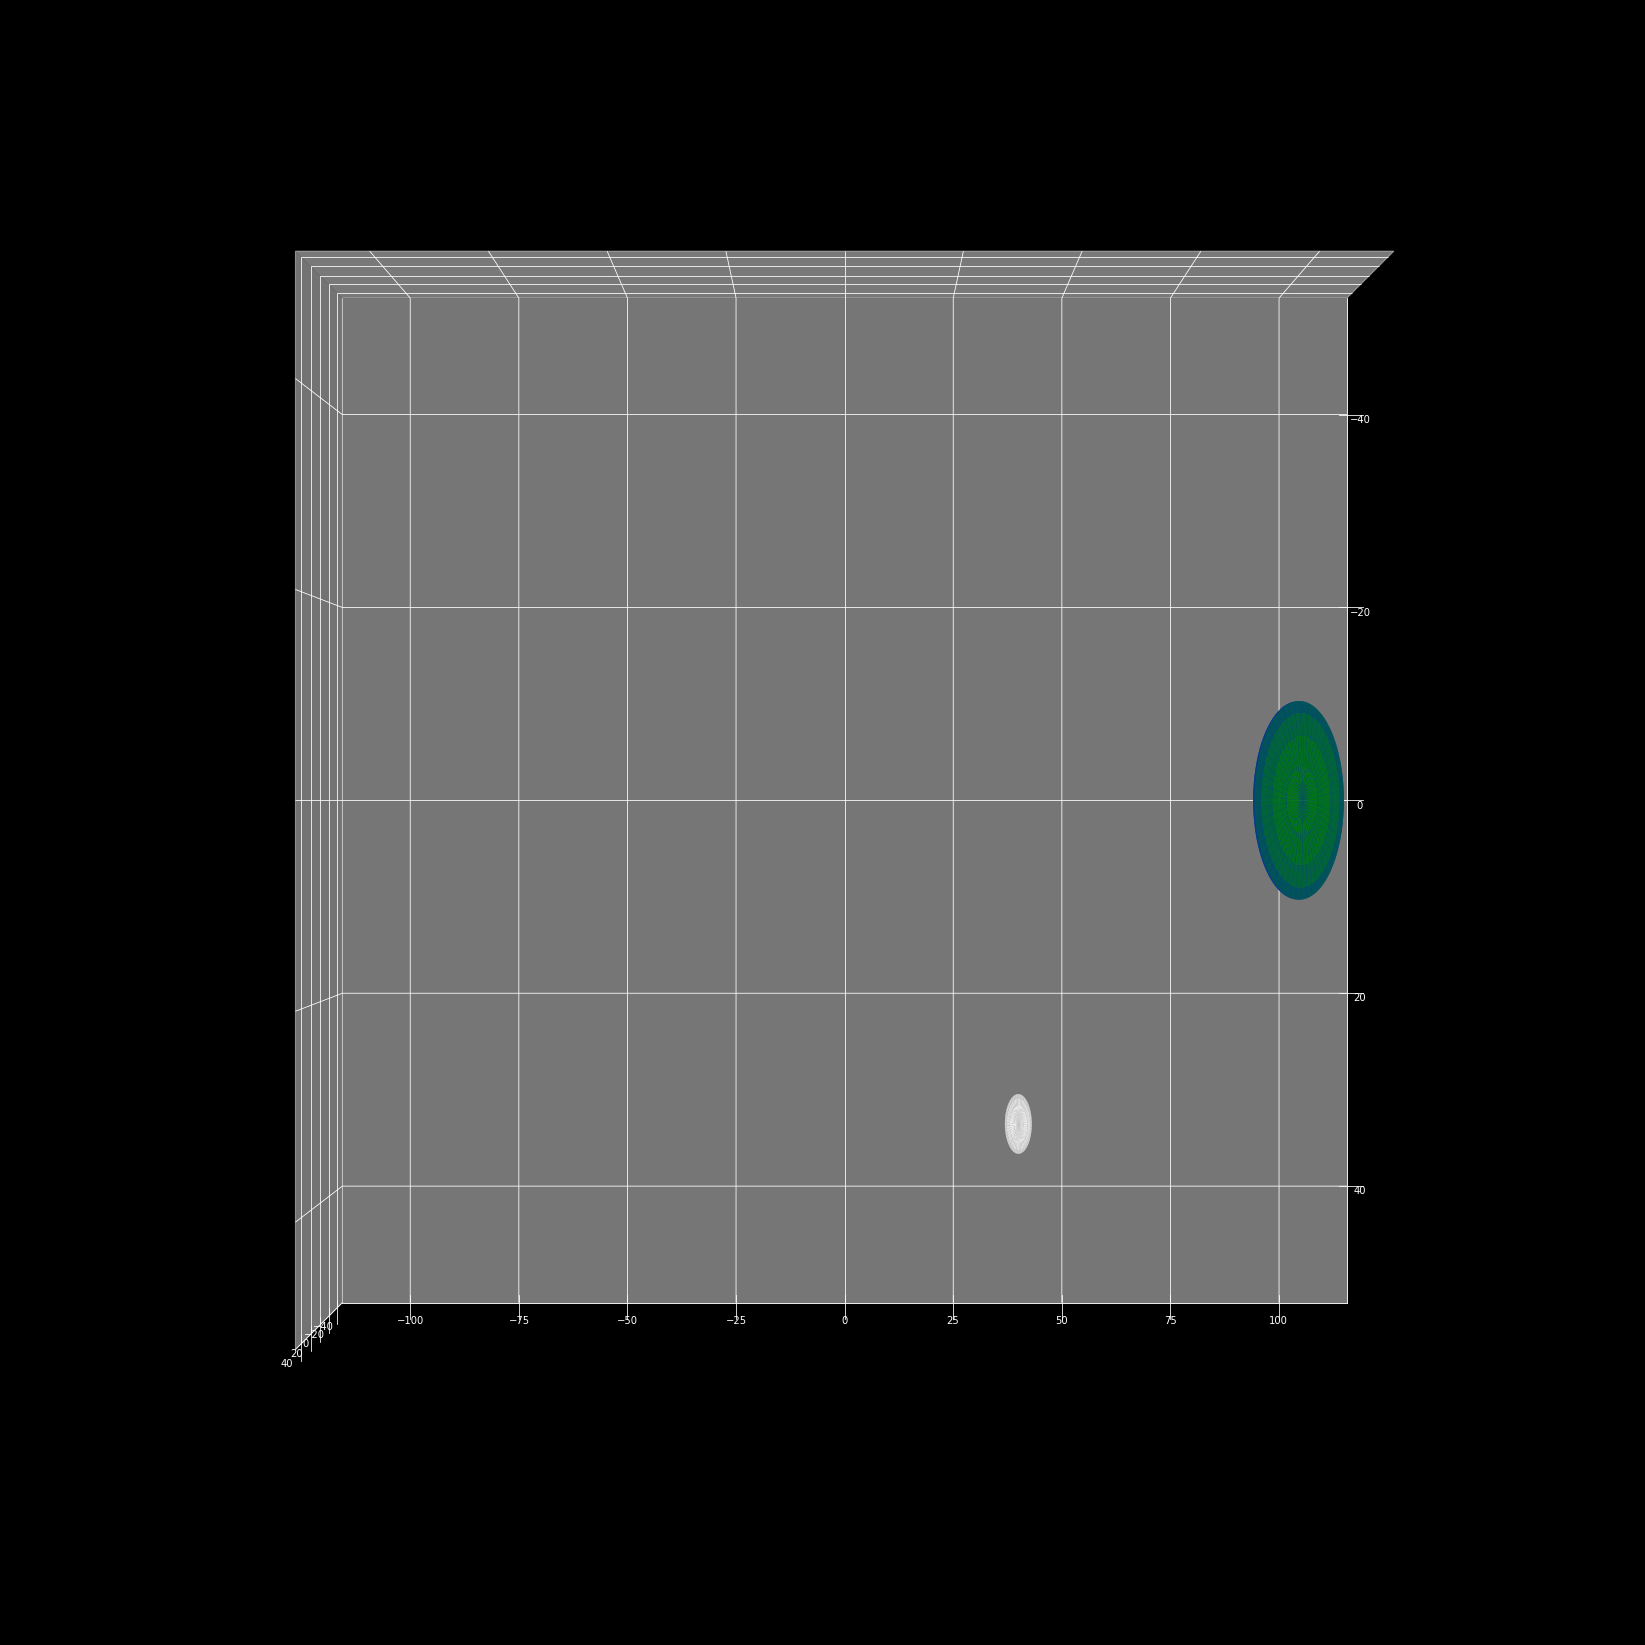

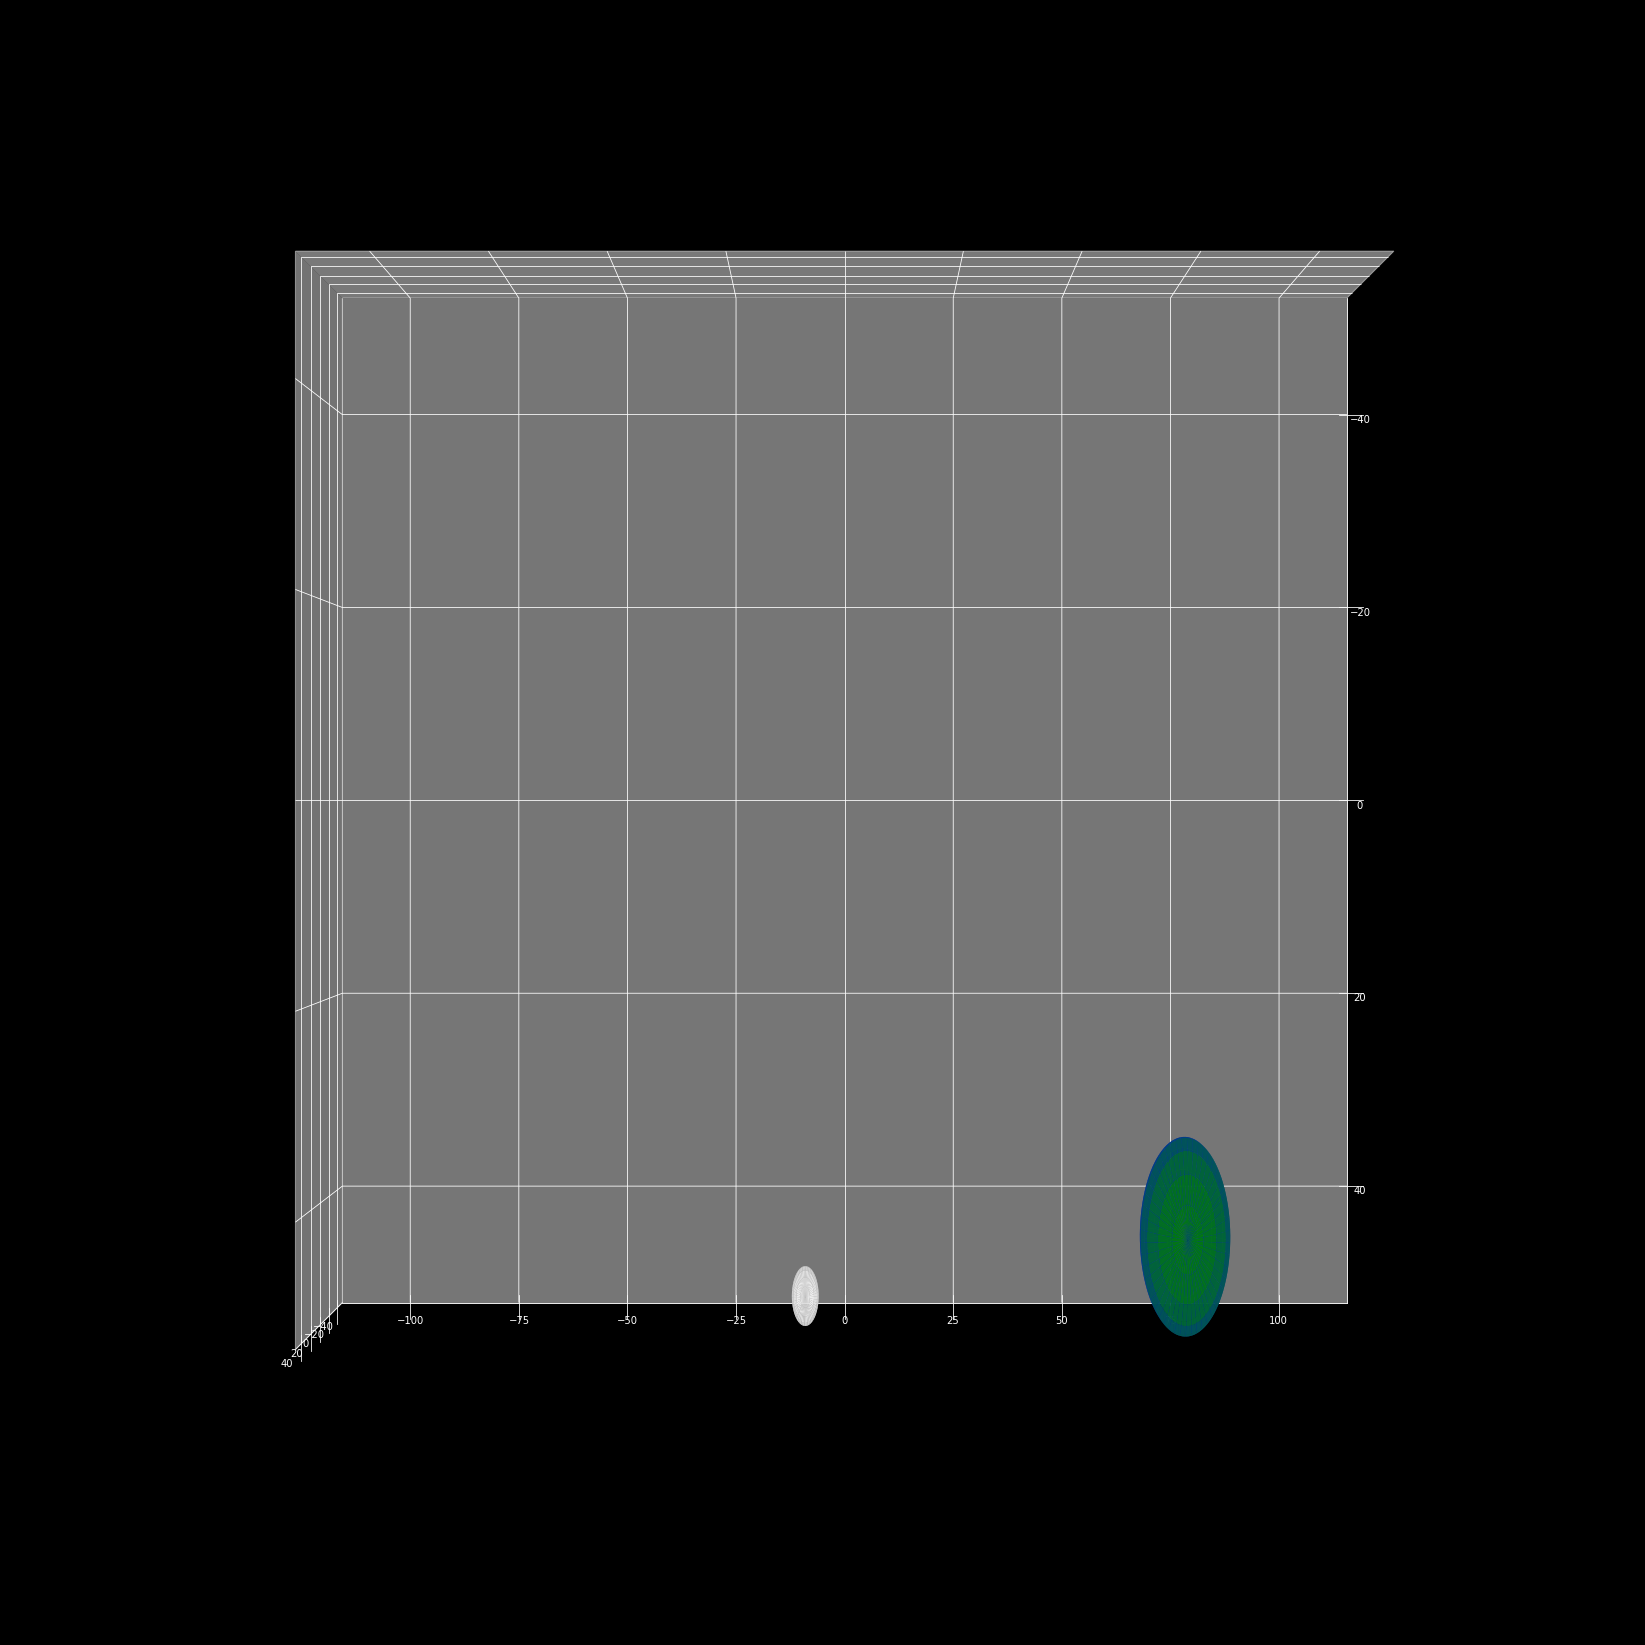

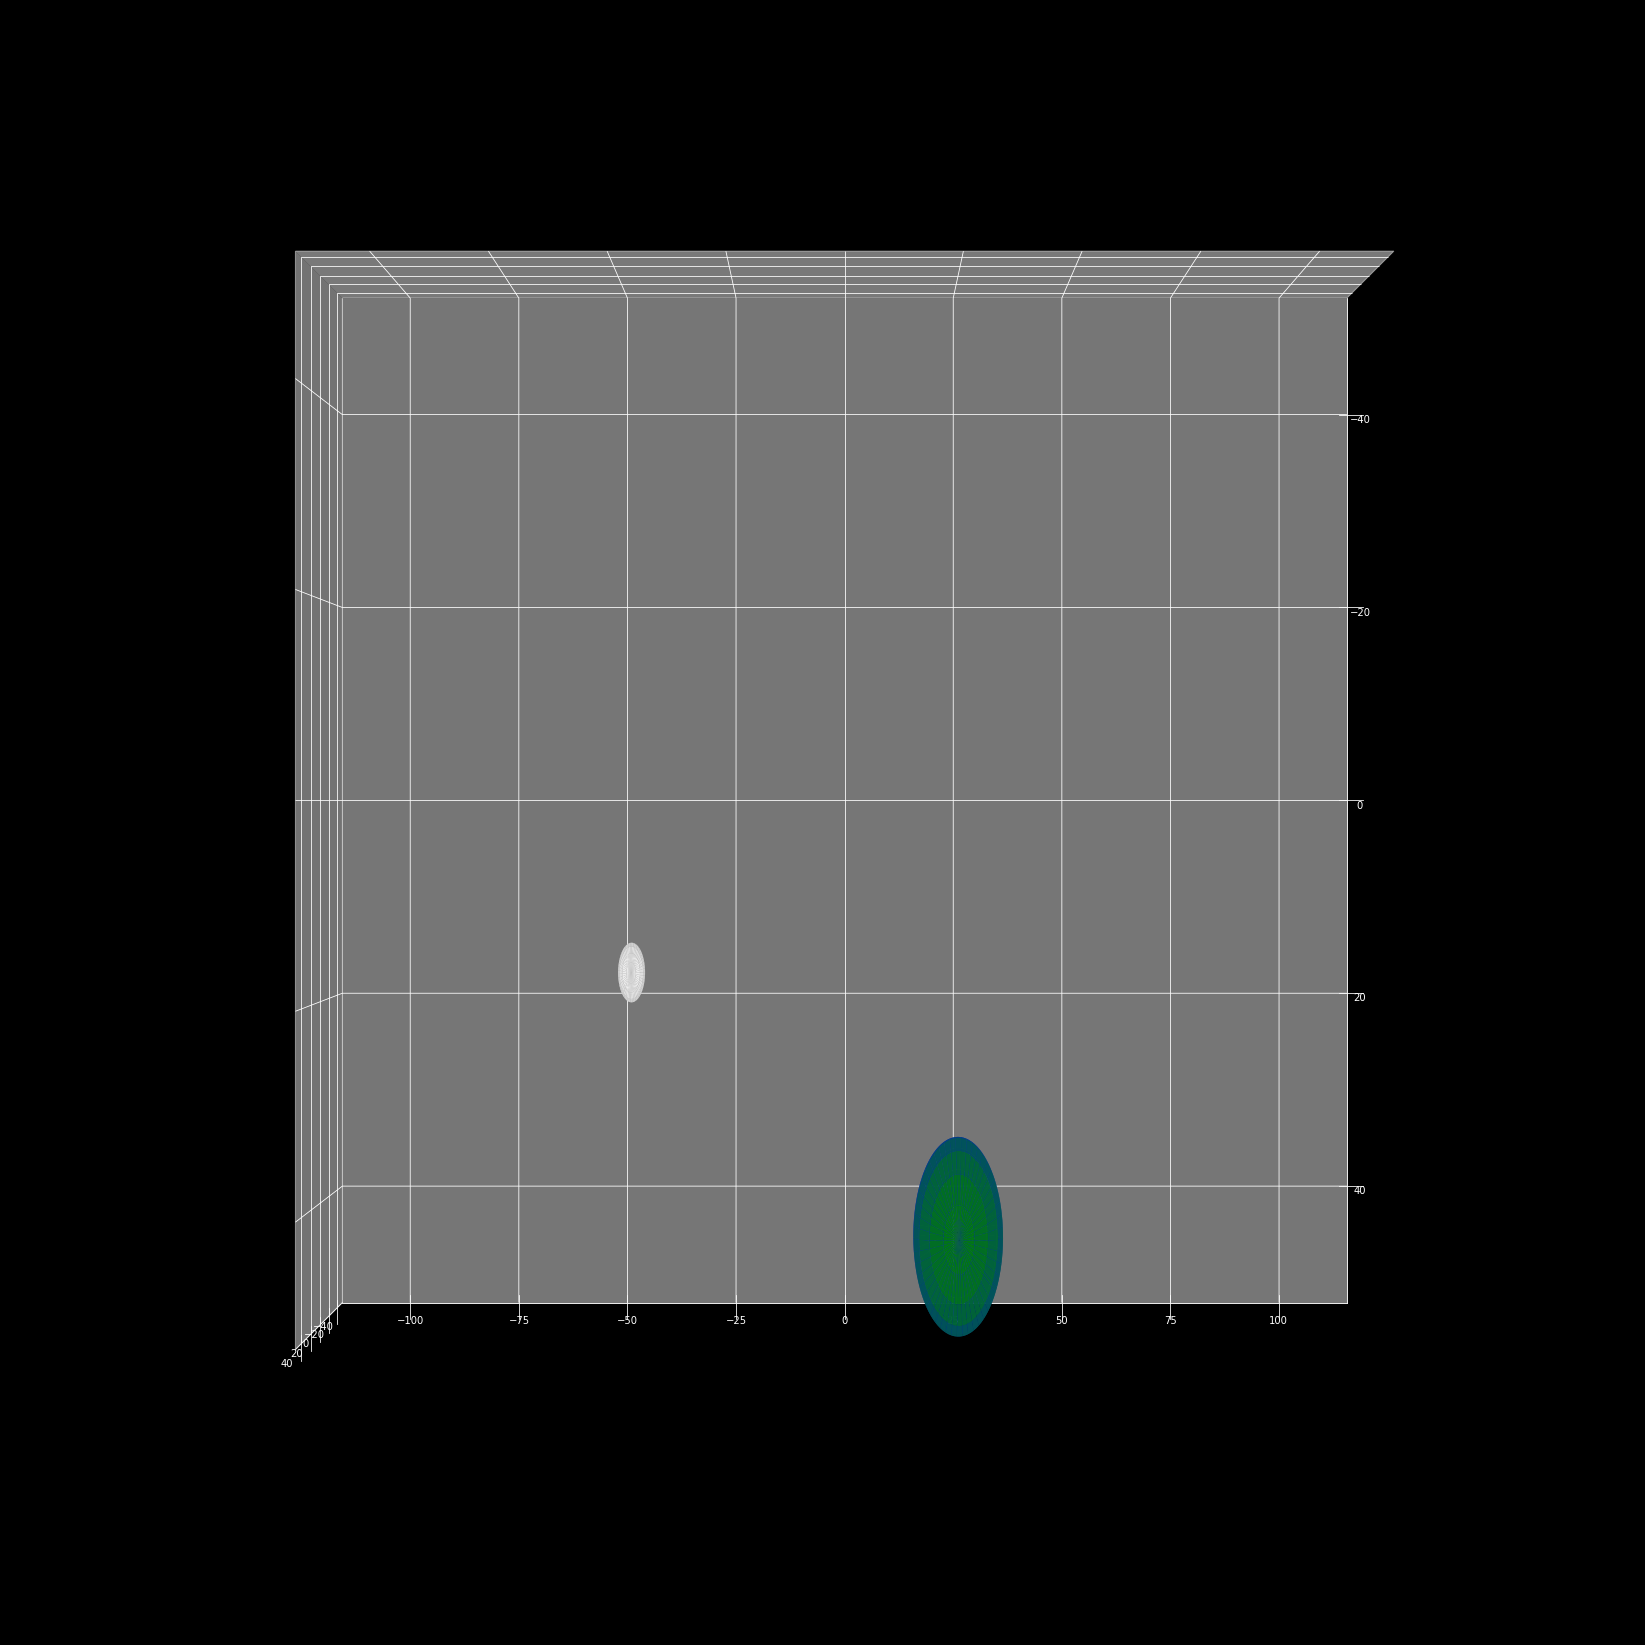

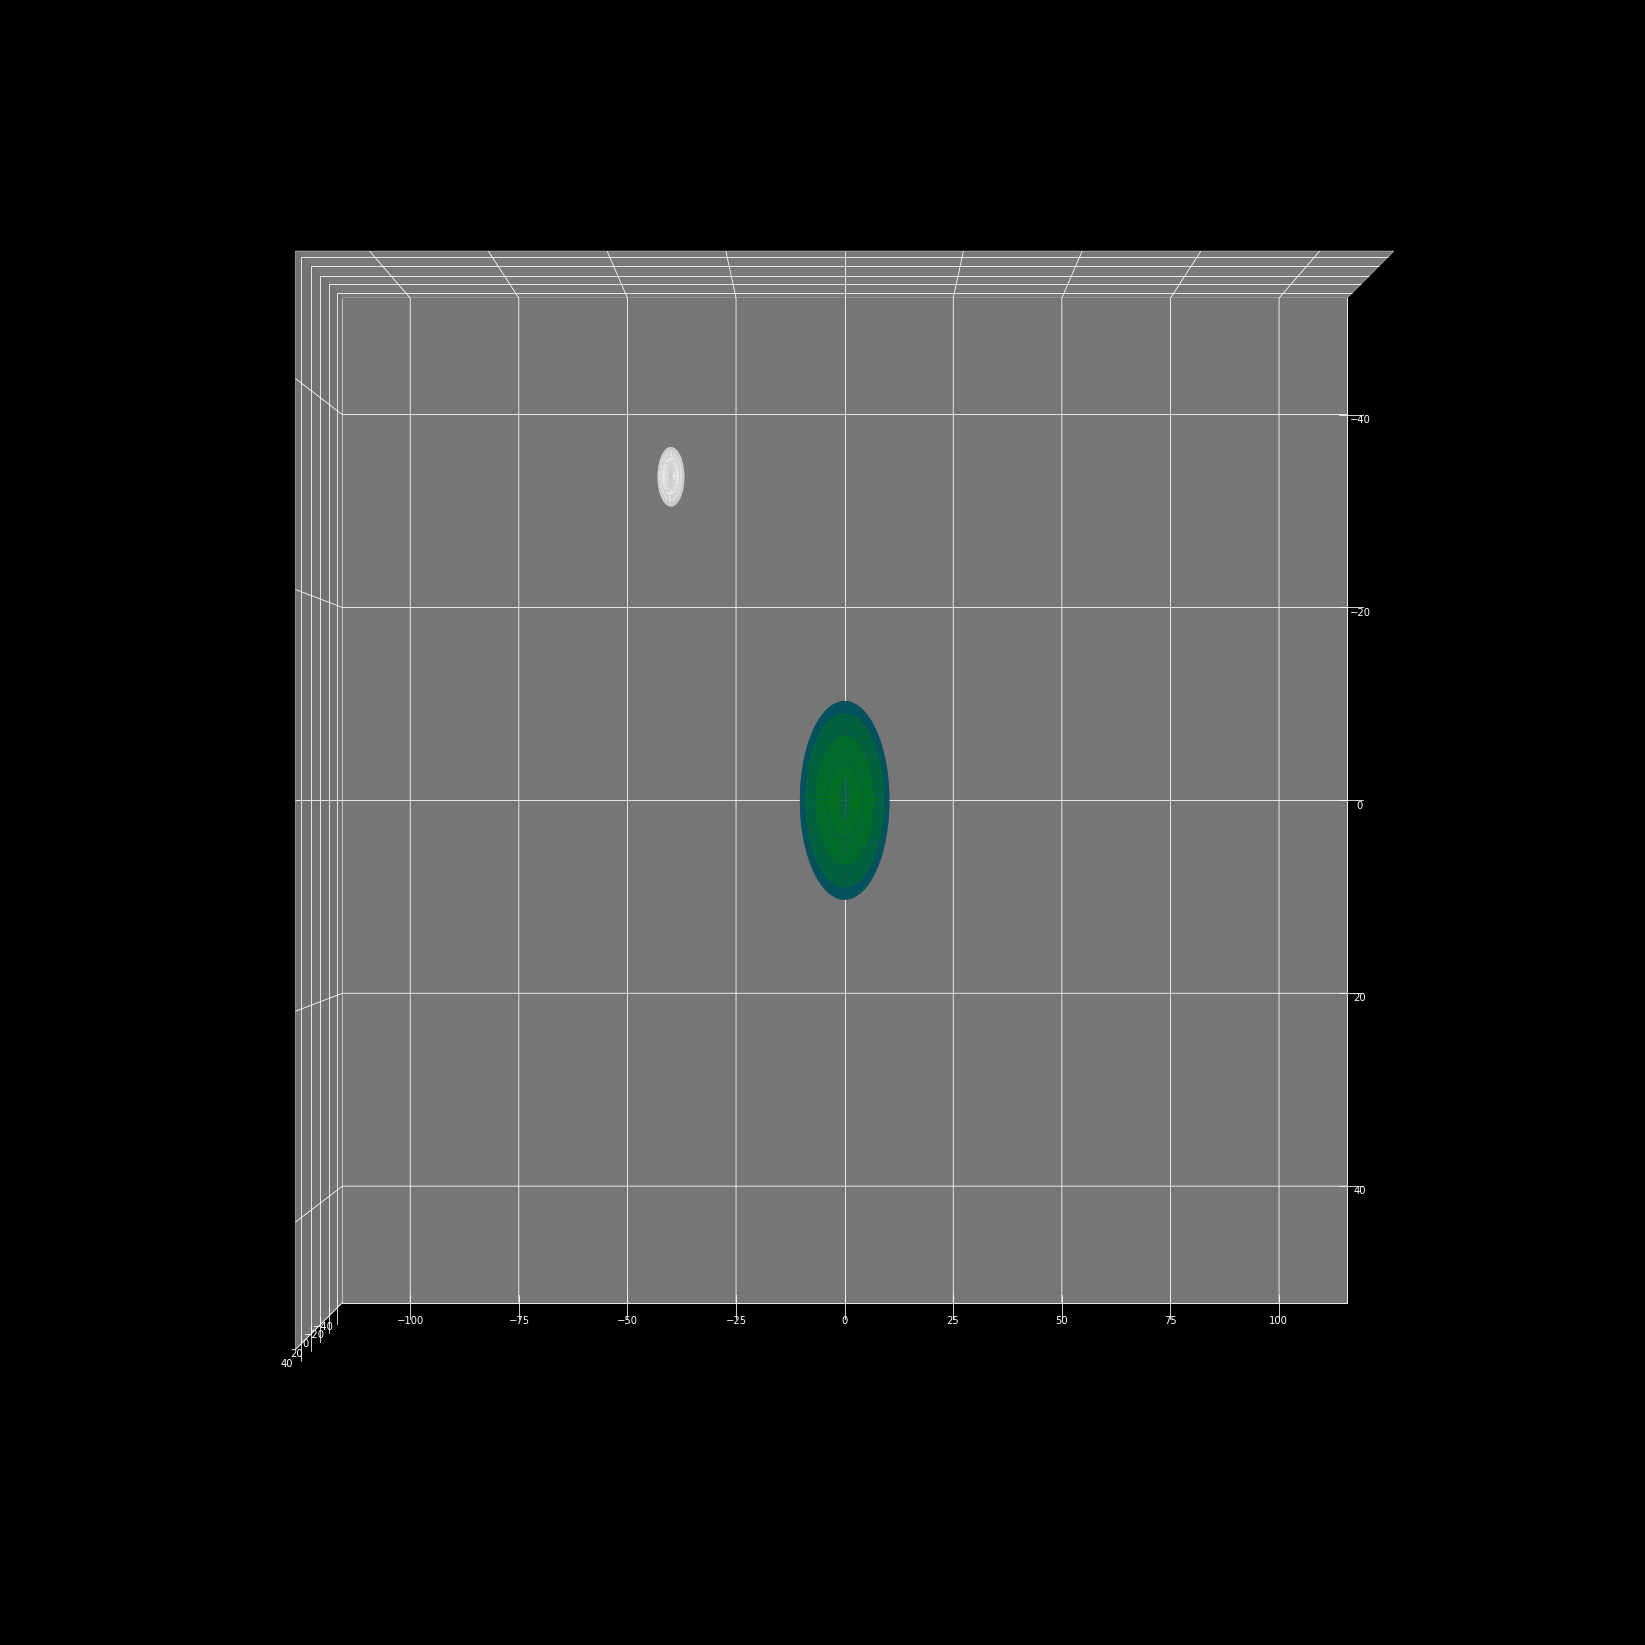

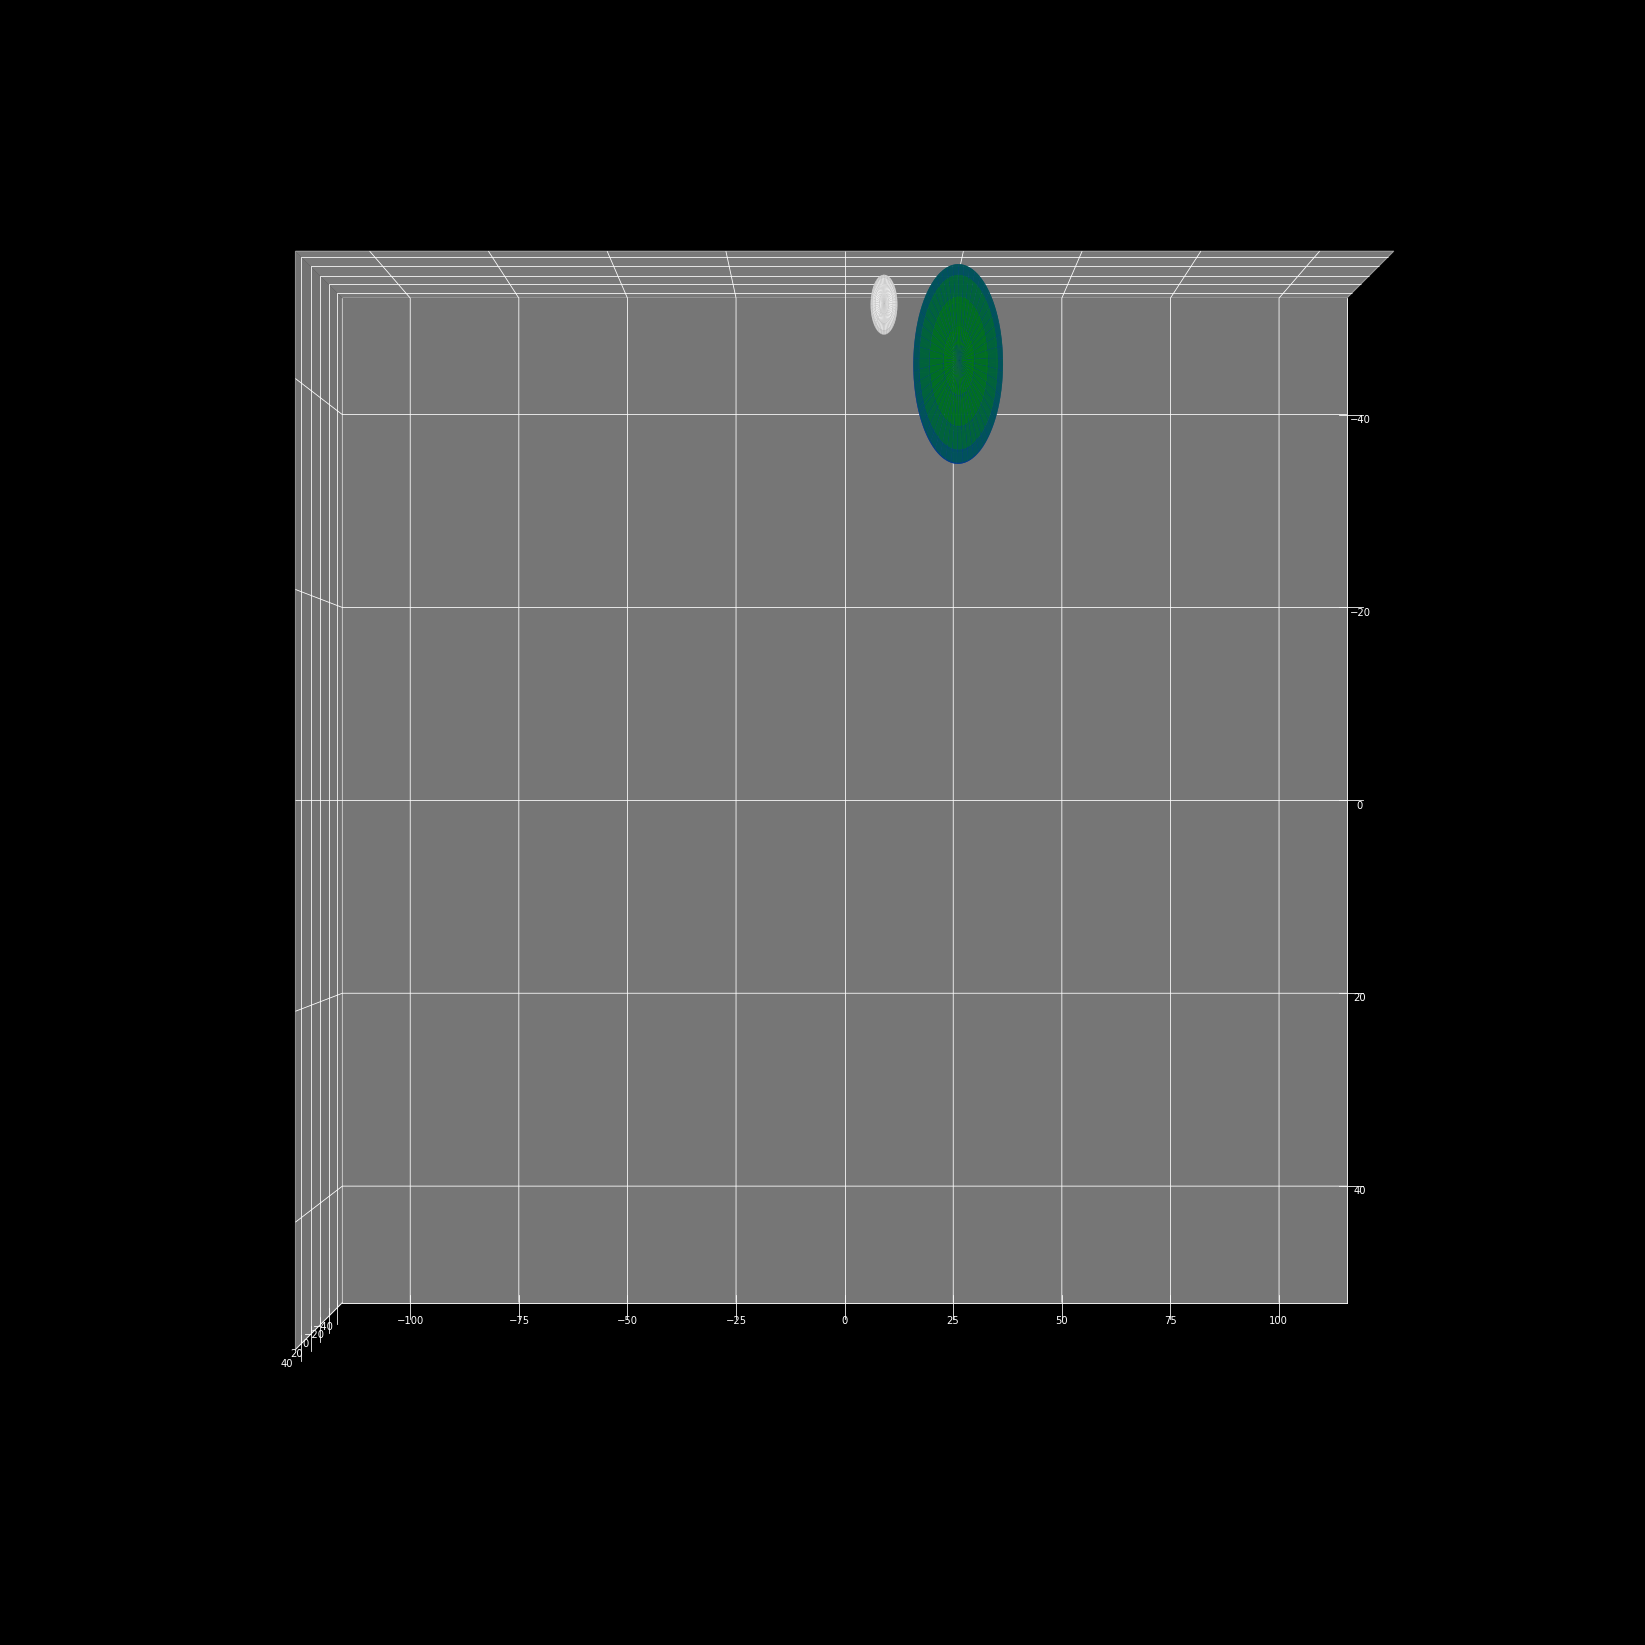

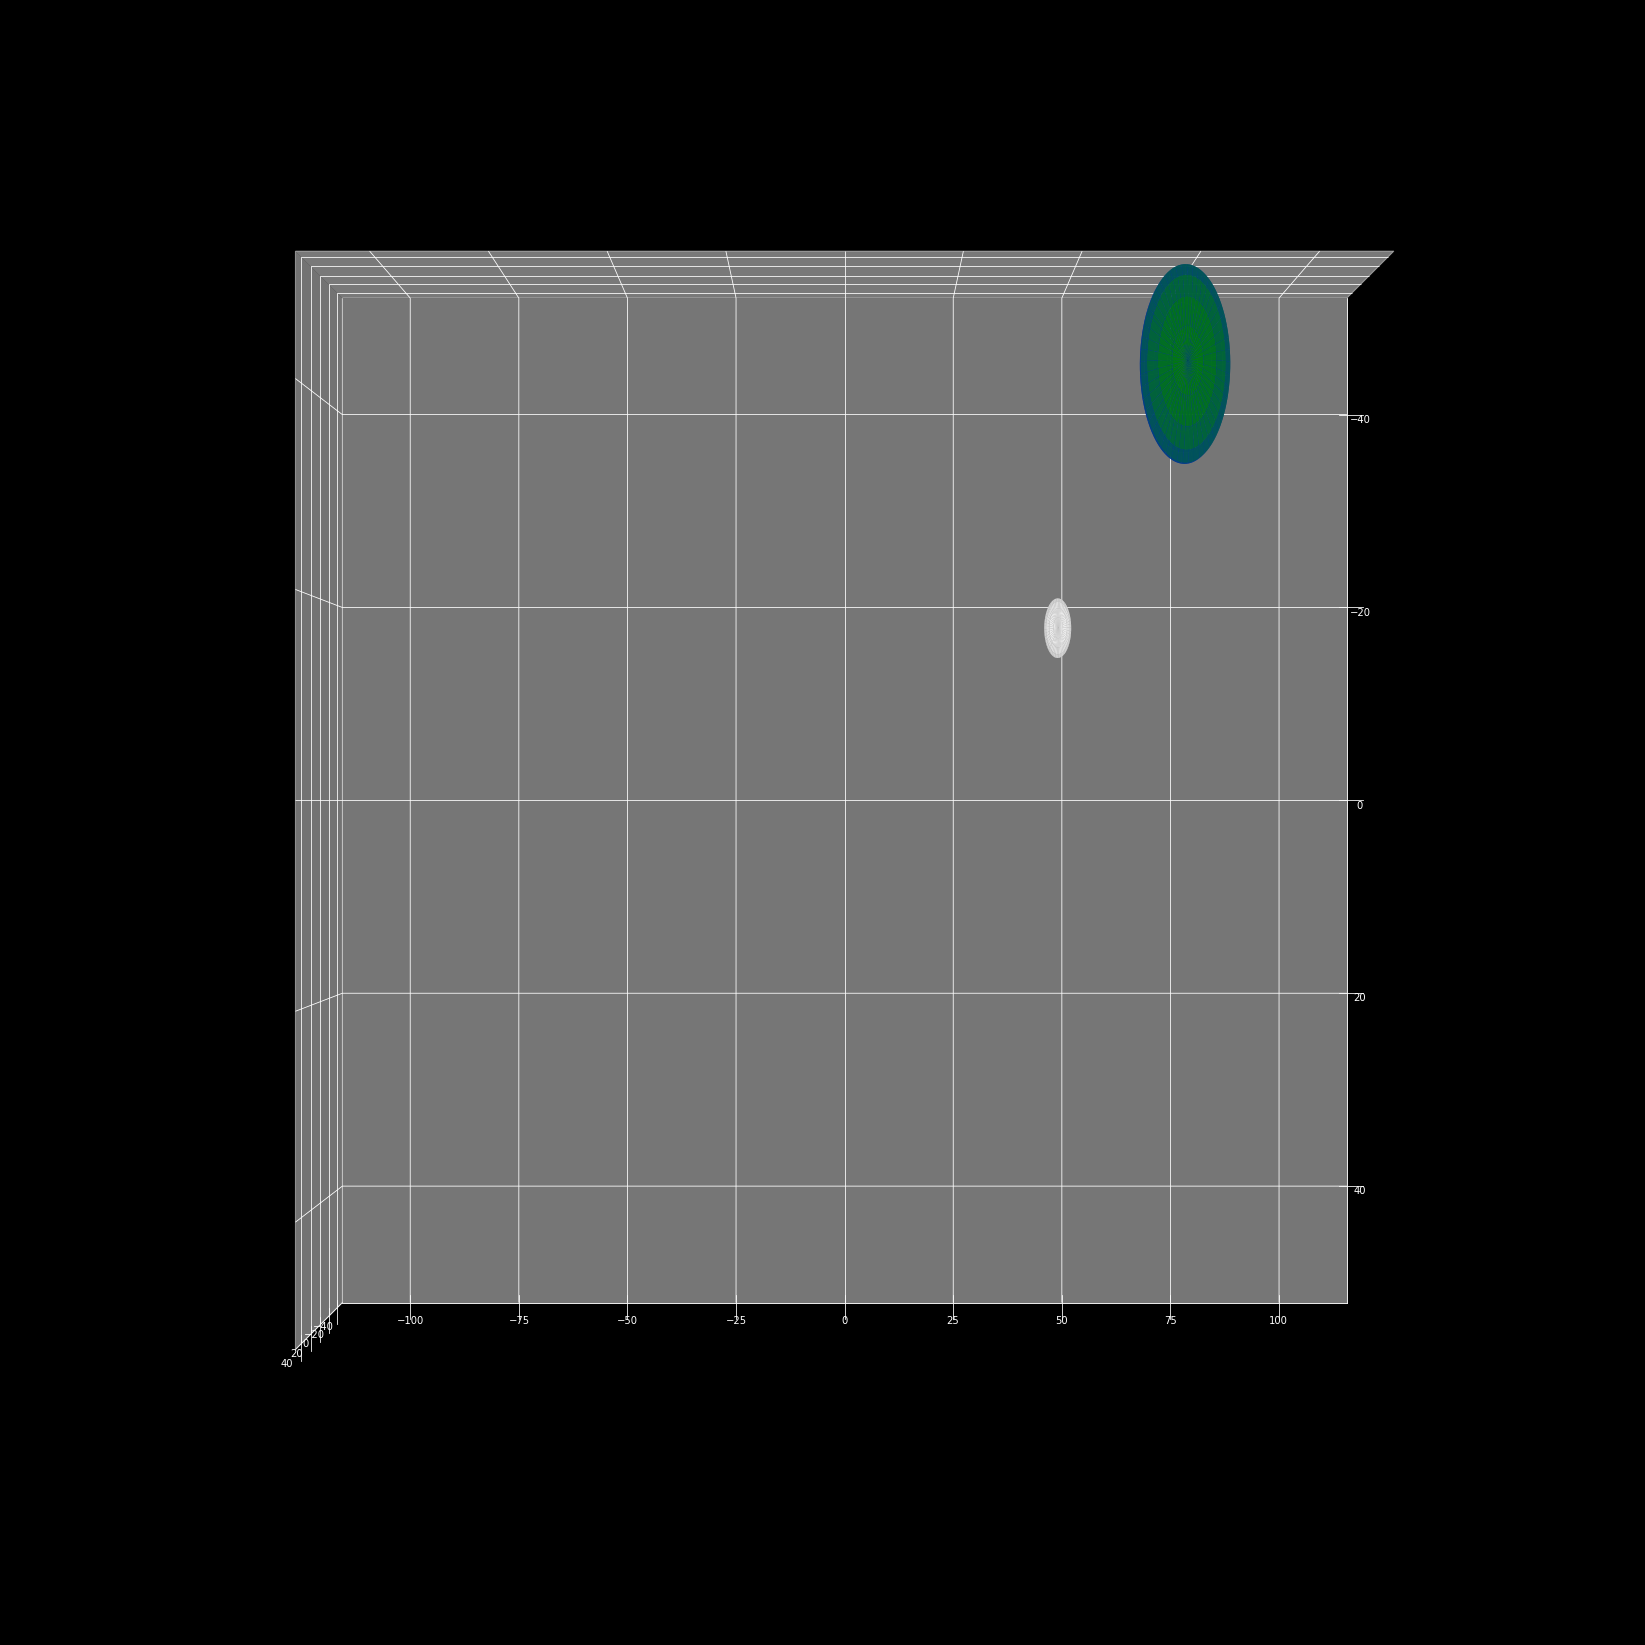

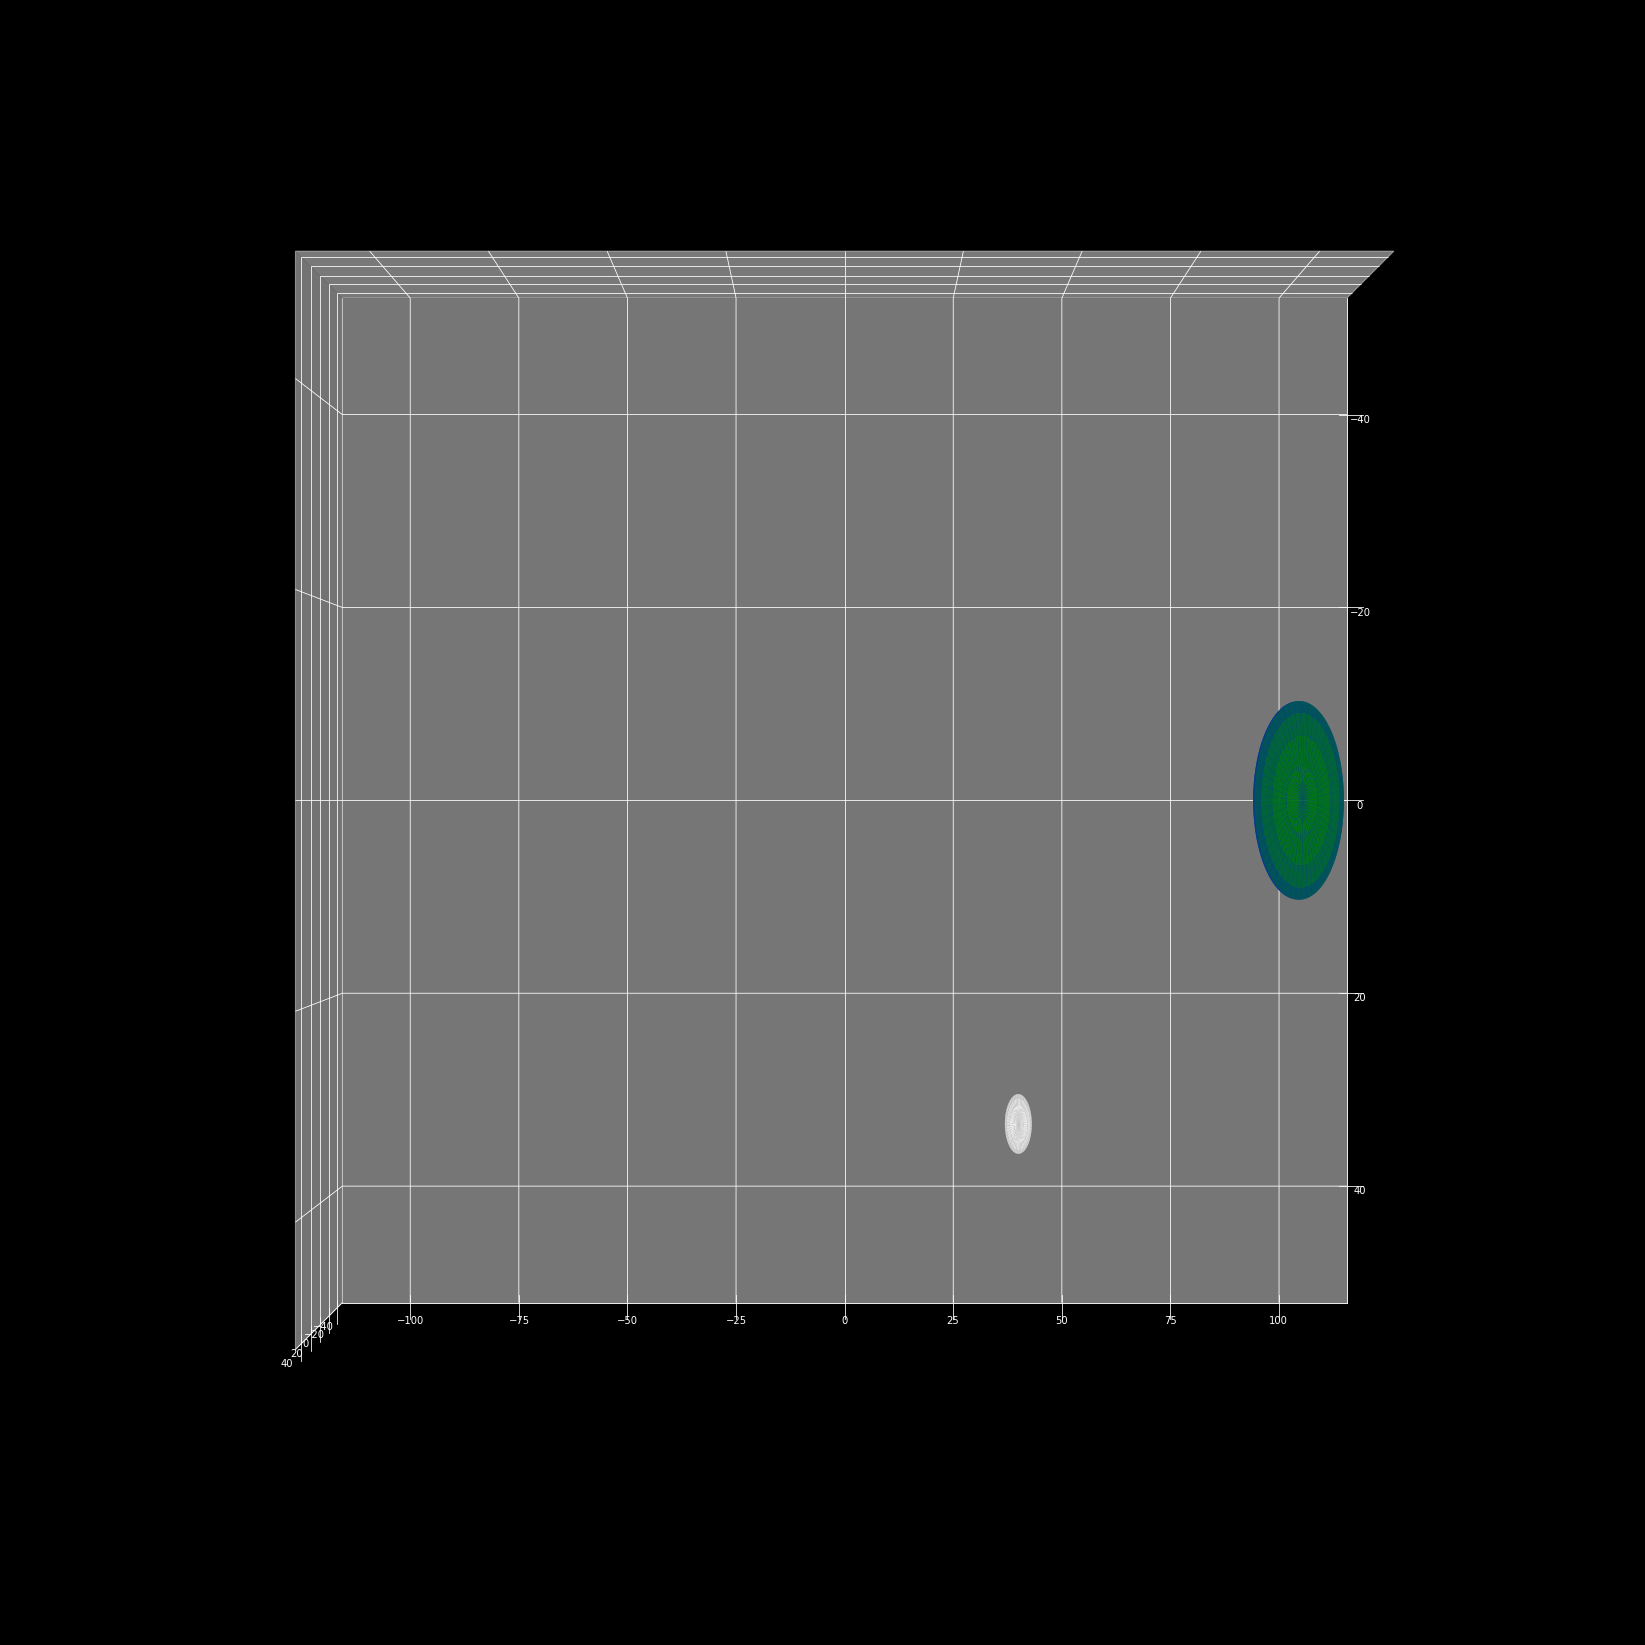

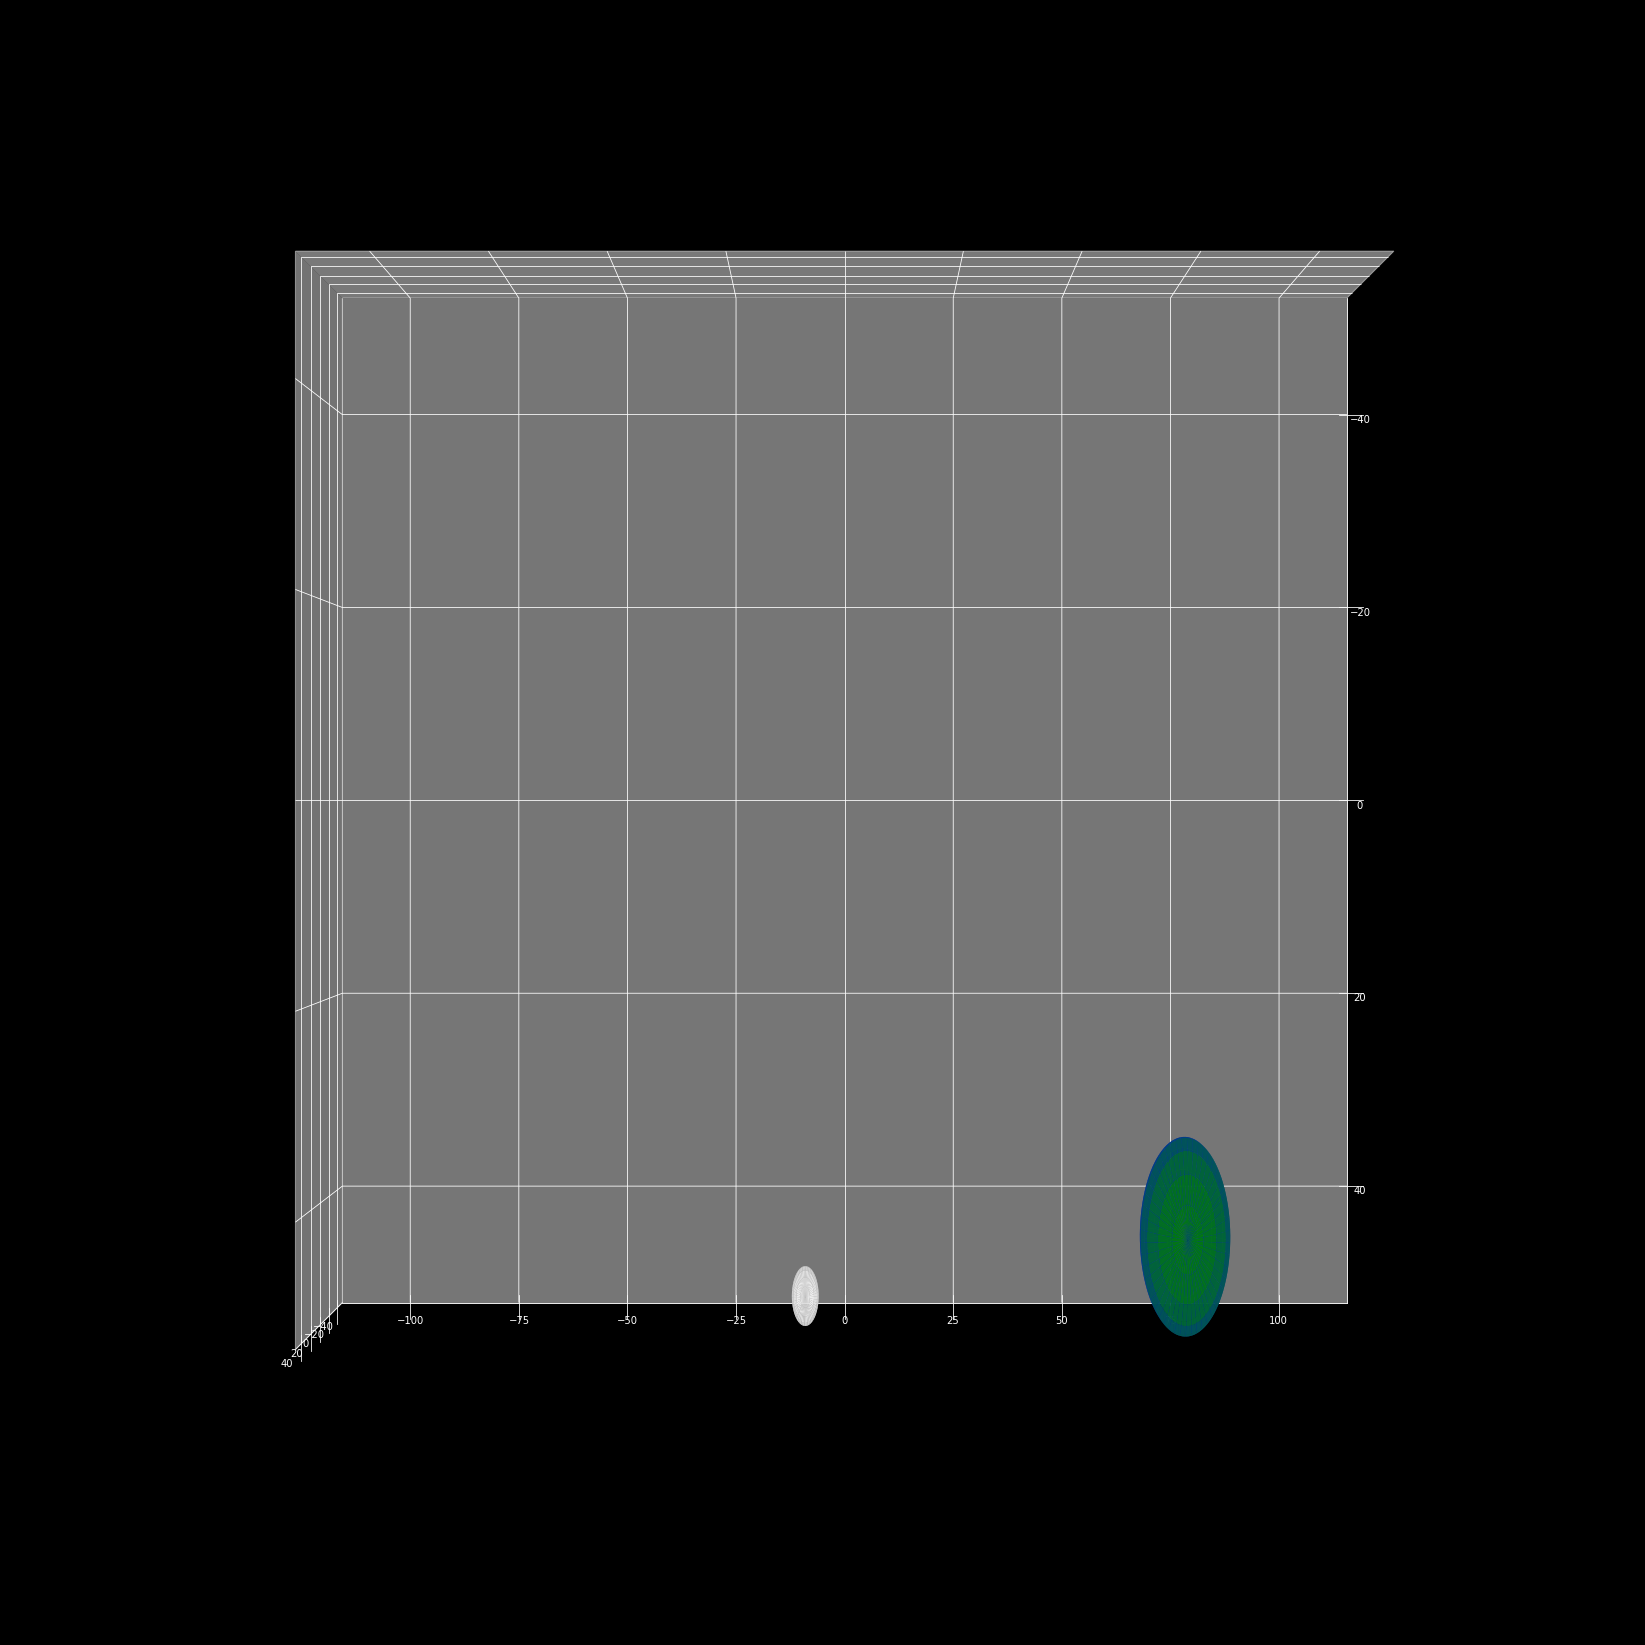

In [64]:
import time 
plt.style.use('dark_background')
# Make the X, Y meshgrid.
X,Y,Z = earth()
X2,Y2,Z2 = moon()
X3,Y3,Z3 = sun()  

# Begin plotting.
wframe = None
tstart = time.time()
# cmap = LinearSegmentedColormap.from_list ('blue_green', ['b', 'g'], 256) #градиентная палитра цвета 256 level
# axes.plot_surface(X, Y, Z, color='#11aa55', cmap=cmap, alpha = 0.9) # цвет градиент, но почти нет прозрачности alpha = 0.9
# T = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[5,0,0,1]])
# Rx=np.array([[1,0,0],
#     [0, np.cos(a1),-np.sin(a1)],
#     [0,np.sin(a1),np.cos(a1)]])

P0 = [0,50,1,1]
Tp_earth = np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ -P0[0],-P0[1],-P0[2] , 1]])
Q_earth=60/180*np.pi;
R_earth=[[np.cos(Q_earth), -np.sin(Q_earth), 0,0],[np.sin(Q_earth), np.cos(Q_earth), 0,0],[0, 0, 1,0],[0,0,0,1]]

TR_earth = np.dot(Tp_earth,R_earth)
Tp_earth = np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ P0[0],P0[1],P0[2] , 1]])
TR_earth = np.dot(TR_earth,Tp_earth)
# XYZ = np.hstack((X.reshape(-1,1),Y.reshape(-1,1),Z.reshape(-1,1),np.ones((X.size,1))))

P_moon = [0,50,1,1]
Tp_moon = np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ -P0[0],-P0[1],-P0[2] , 1]])
Q_moon=30/180*np.pi;
R_moon=[[np.cos(Q_moon), -np.sin(Q_moon), 0,0],[np.sin(Q_moon), np.cos(Q_moon), 0,0],[0, 0, 1,0],[0,0,0,1]]
Tp_moon=np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ -P0[0],-P0[1],-P0[2] , 1]])

XYZ = np.hstack((X.reshape(-1,1),Y.reshape(-1,1),Z.reshape(-1,1),np.ones((X.size,1))))
XYZ_moon = np.hstack((X2.reshape(-1,1),Y2.reshape(-1,1),Z2.reshape(-1,1),np.ones((X2.size,1))))
XYZ_sun = np.hstack((X3.reshape(-1,1),Y3.reshape(-1,1),Z3.reshape(-1,1),np.ones((X3.size,1))))
XYZ_moon =np.dot(XYZ_moon,Tp_moon)
# print(XYZ.shape)
# print(XYZ)

for phi in range(10):#np.linspace(0, 180. / np.pi, 100):
#     axes.view_init(30, 90)

    fig = plt.figure(figsize = (30,30))
    axes = fig.add_subplot(projection='3d')
    axes.view_init(elev=90, azim=0)
    axes.set_xlim(-50, 50)
    axes.set_ylim(-111, 111)
    axes.set_zlim(-50, 50)
    XYZ = XYZ.dot(TR_earth)
    Q_moon=(30+ 10)/180*np.pi;
    R_moon=[[np.cos(Q_moon), -np.sin(Q_moon), 0,0],[np.sin(Q_moon), np.cos(Q_moon), 0,0],[0, 0, 1,0],[0,0,0,1]]
    TPm_earth=np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ -XYZ[0,0],-XYZ[0,1],-XYZ[0,2]-10 , 1]])
    TR_moon = np.dot(TPm_earth,R_moon)
    TPm_earth=np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ XYZ[0,0],XYZ[0,1],XYZ[0,2]-10 , 1]])
    
    TR_moon = np.dot(TPm_earth,R_moon)
    XYZ1_moon= XYZ_moon.dot(TR_moon)
    # If a line collection is already remove it before drawing.
    if wframe:
        wframe.remove()
    # Generate data.
    # Plot the new wireframe and pause briefly before continuing.
#     cmap_sun = LinearSegmentedColormap.from_list ('yellow', ['y', 'r'], 256) #градиентная палитра цвета 256 level
#     axes.plot_surface(XYZ_sun[:,0].reshape(-1,10), XYZ_sun[:,1].reshape(-1,10)+50, XYZ_sun[:,2].reshape(-1,10),color='#11aa55', cmap=cmap_sun, alpha = 0.9) # цвет градиент, но почти нет прозрачности alpha = 0.9
    
    cmap_moon = LinearSegmentedColormap.from_list ('gray', ['gray', 'white'], 256) #градиентная палитра цвета 256 level
    axes.plot_surface(XYZ1_moon[:,0].reshape(-1,10), XYZ1_moon[:,1].reshape(-1,10), XYZ1_moon[:,2].reshape(-1,10),color='#11aa55', cmap=cmap_moon, alpha = 0.9) # цвет градиент, но почти нет прозрачности alpha = 0.9

    cmap = LinearSegmentedColormap.from_list ('blue_green', ['b', 'g'], 256) 
    axes.plot_surface(XYZ[:,0].reshape(-1,10), XYZ[:,1].reshape(-1,10), XYZ[:,2].reshape(-1,10),color='#11aa55', cmap=cmap, alpha = 0.9)
#     #plt.pause(.001)
    #plt.show()
#     plt.savefig('filename'+str(phi)+'.png')

# print(XYZ)


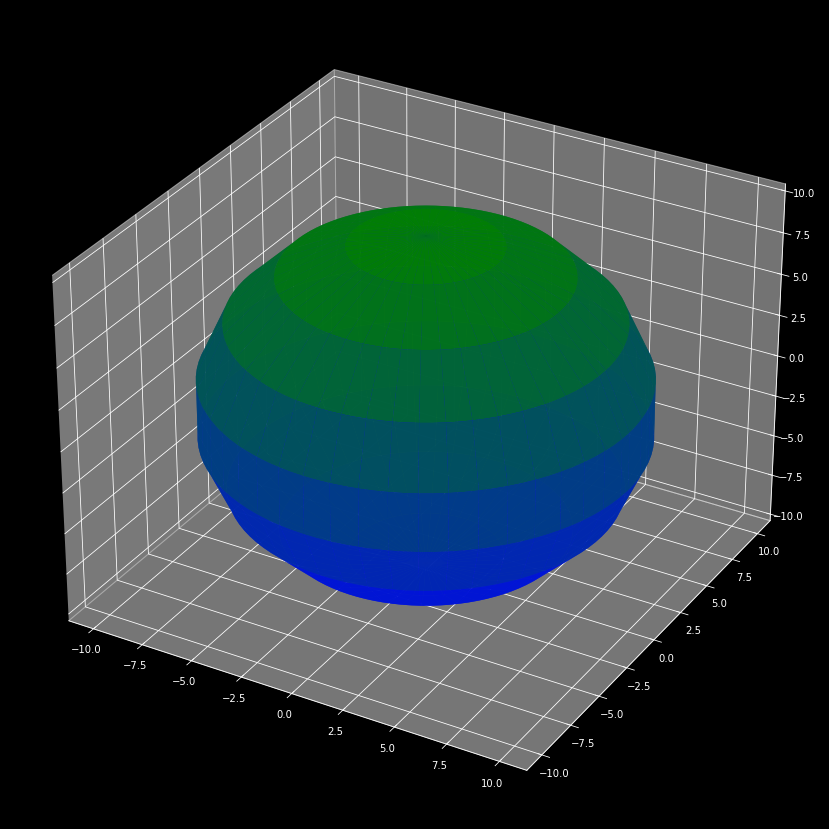

In [5]:
x,y,z = earth()
fig = plt.figure(figsize = (15,15))
axes = fig.add_subplot(projection='3d')
cmap = LinearSegmentedColormap.from_list ('blue_green', ['b', 'g'], 256) #градиентная палитра цвета 256 level
axes.plot_surface(x, y, z, color='#11aa55', cmap=cmap, alpha = 0.9) 
plt.show()

In [6]:
P0 = [0,0,0,1]
Tp = np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ -P0[0],-P0[1],-P0[2] , 1]])

Q=60/180*np.pi;
R=[[np.cos(Q), -np.sin(Q), 0,0],[np.sin(Q), np.cos(Q), 0,0],[0, 0, 1,0],[0,0,0,1]]

TR = np.dot(Tp,R)
Tp = np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ P0[0],P0[1],P0[2] , 1]])
TR = np.dot(TR,Tp)

[[  0.5         -0.8660254    0.           0.        ]
 [  0.8660254    0.5          0.           0.        ]
 [  0.           0.           1.           0.        ]
 [-43.30127019  25.           0.           1.        ]]
[[  0.5         -0.8660254    0.           0.        ]
 [  0.8660254    0.5          0.           0.        ]
 [  0.           0.           1.           0.        ]
 [-43.30127019  25.           0.           1.        ]]


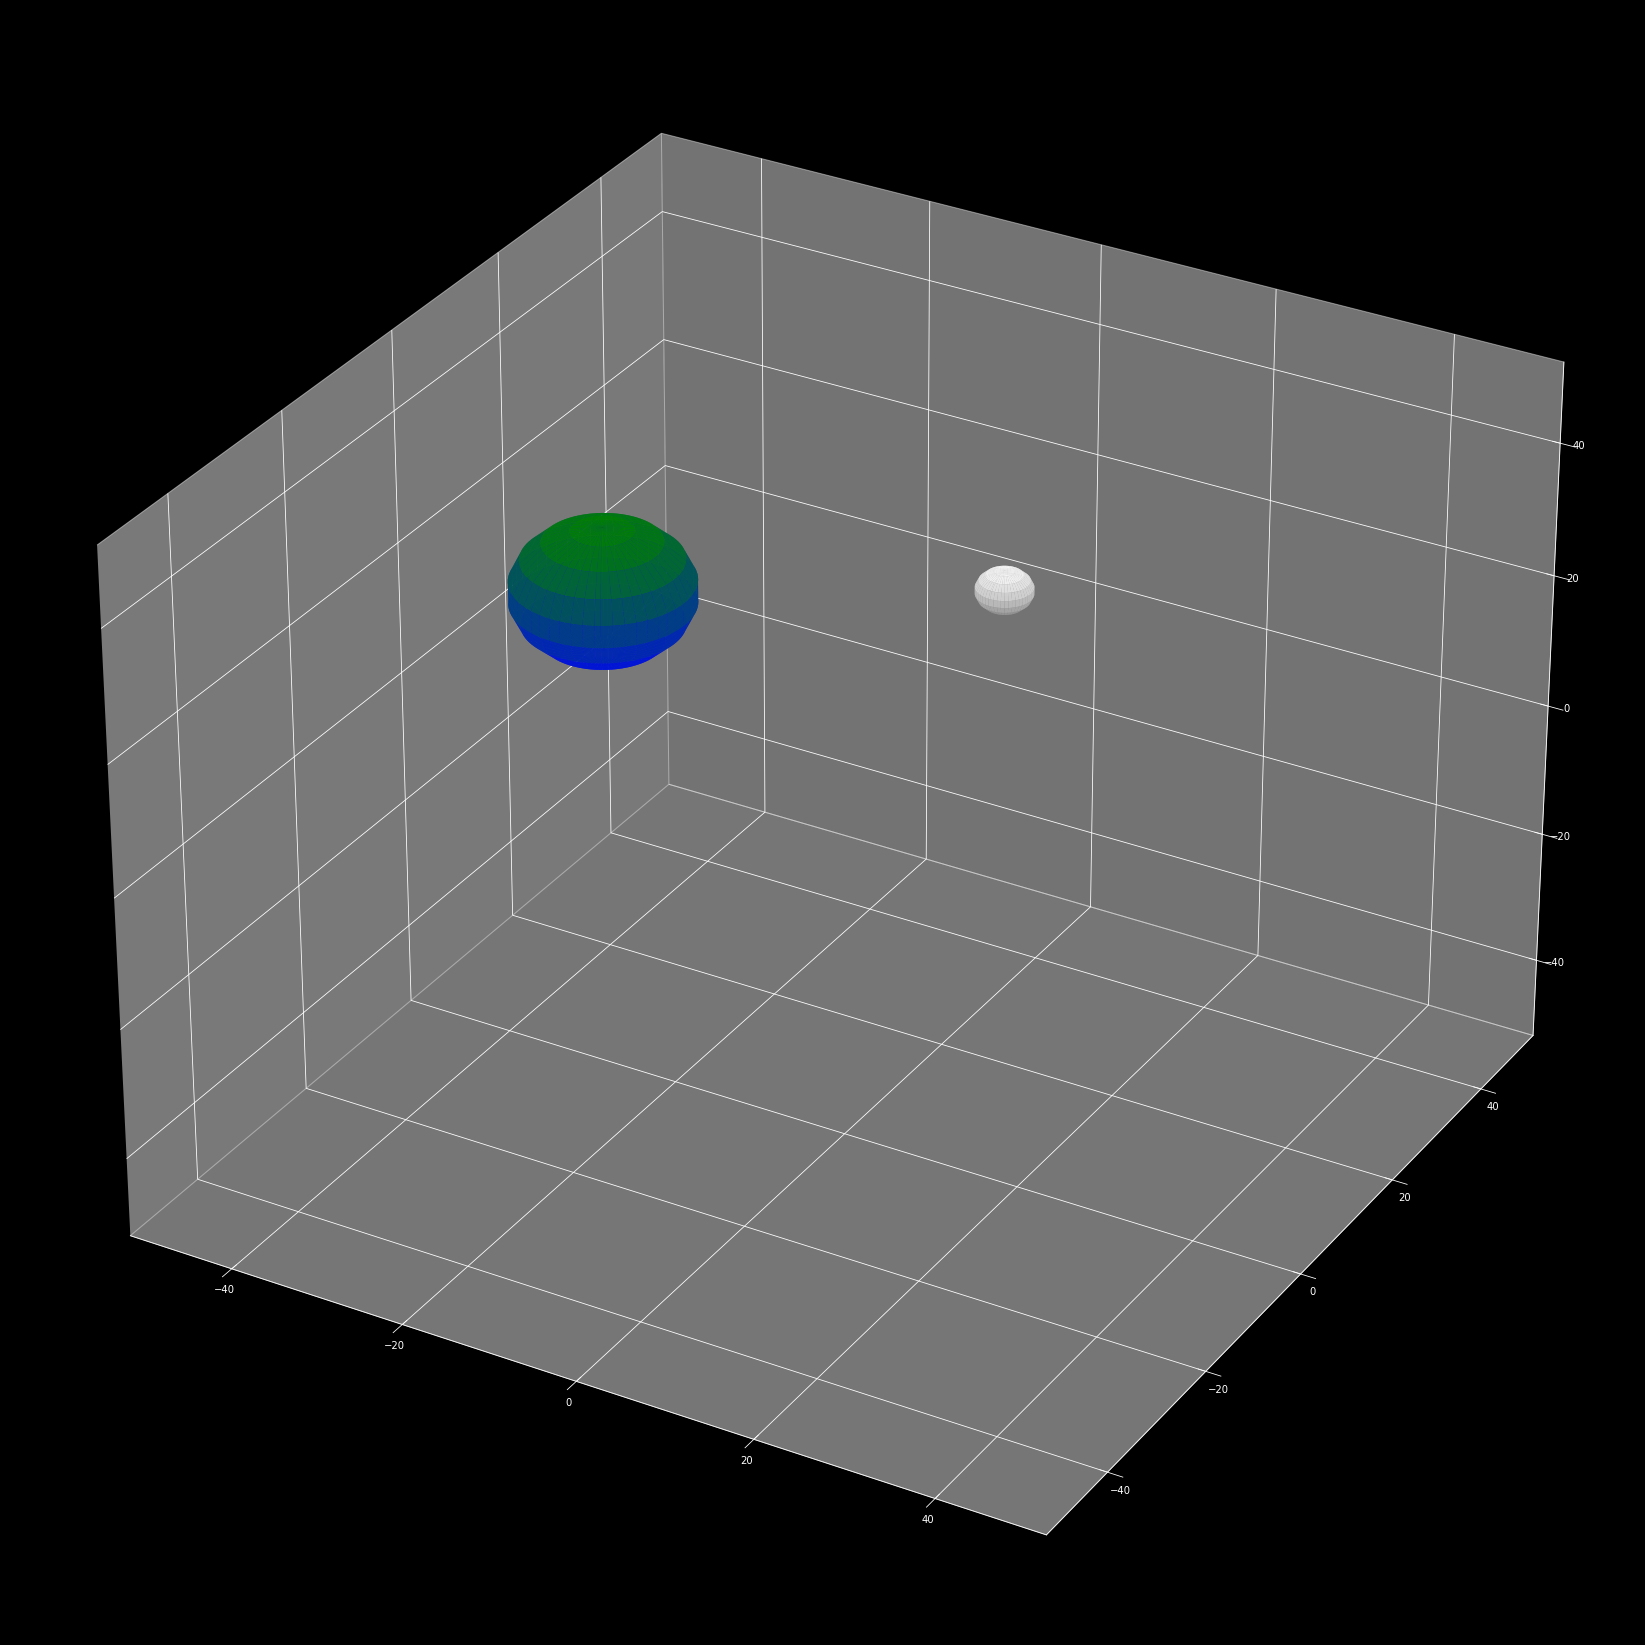

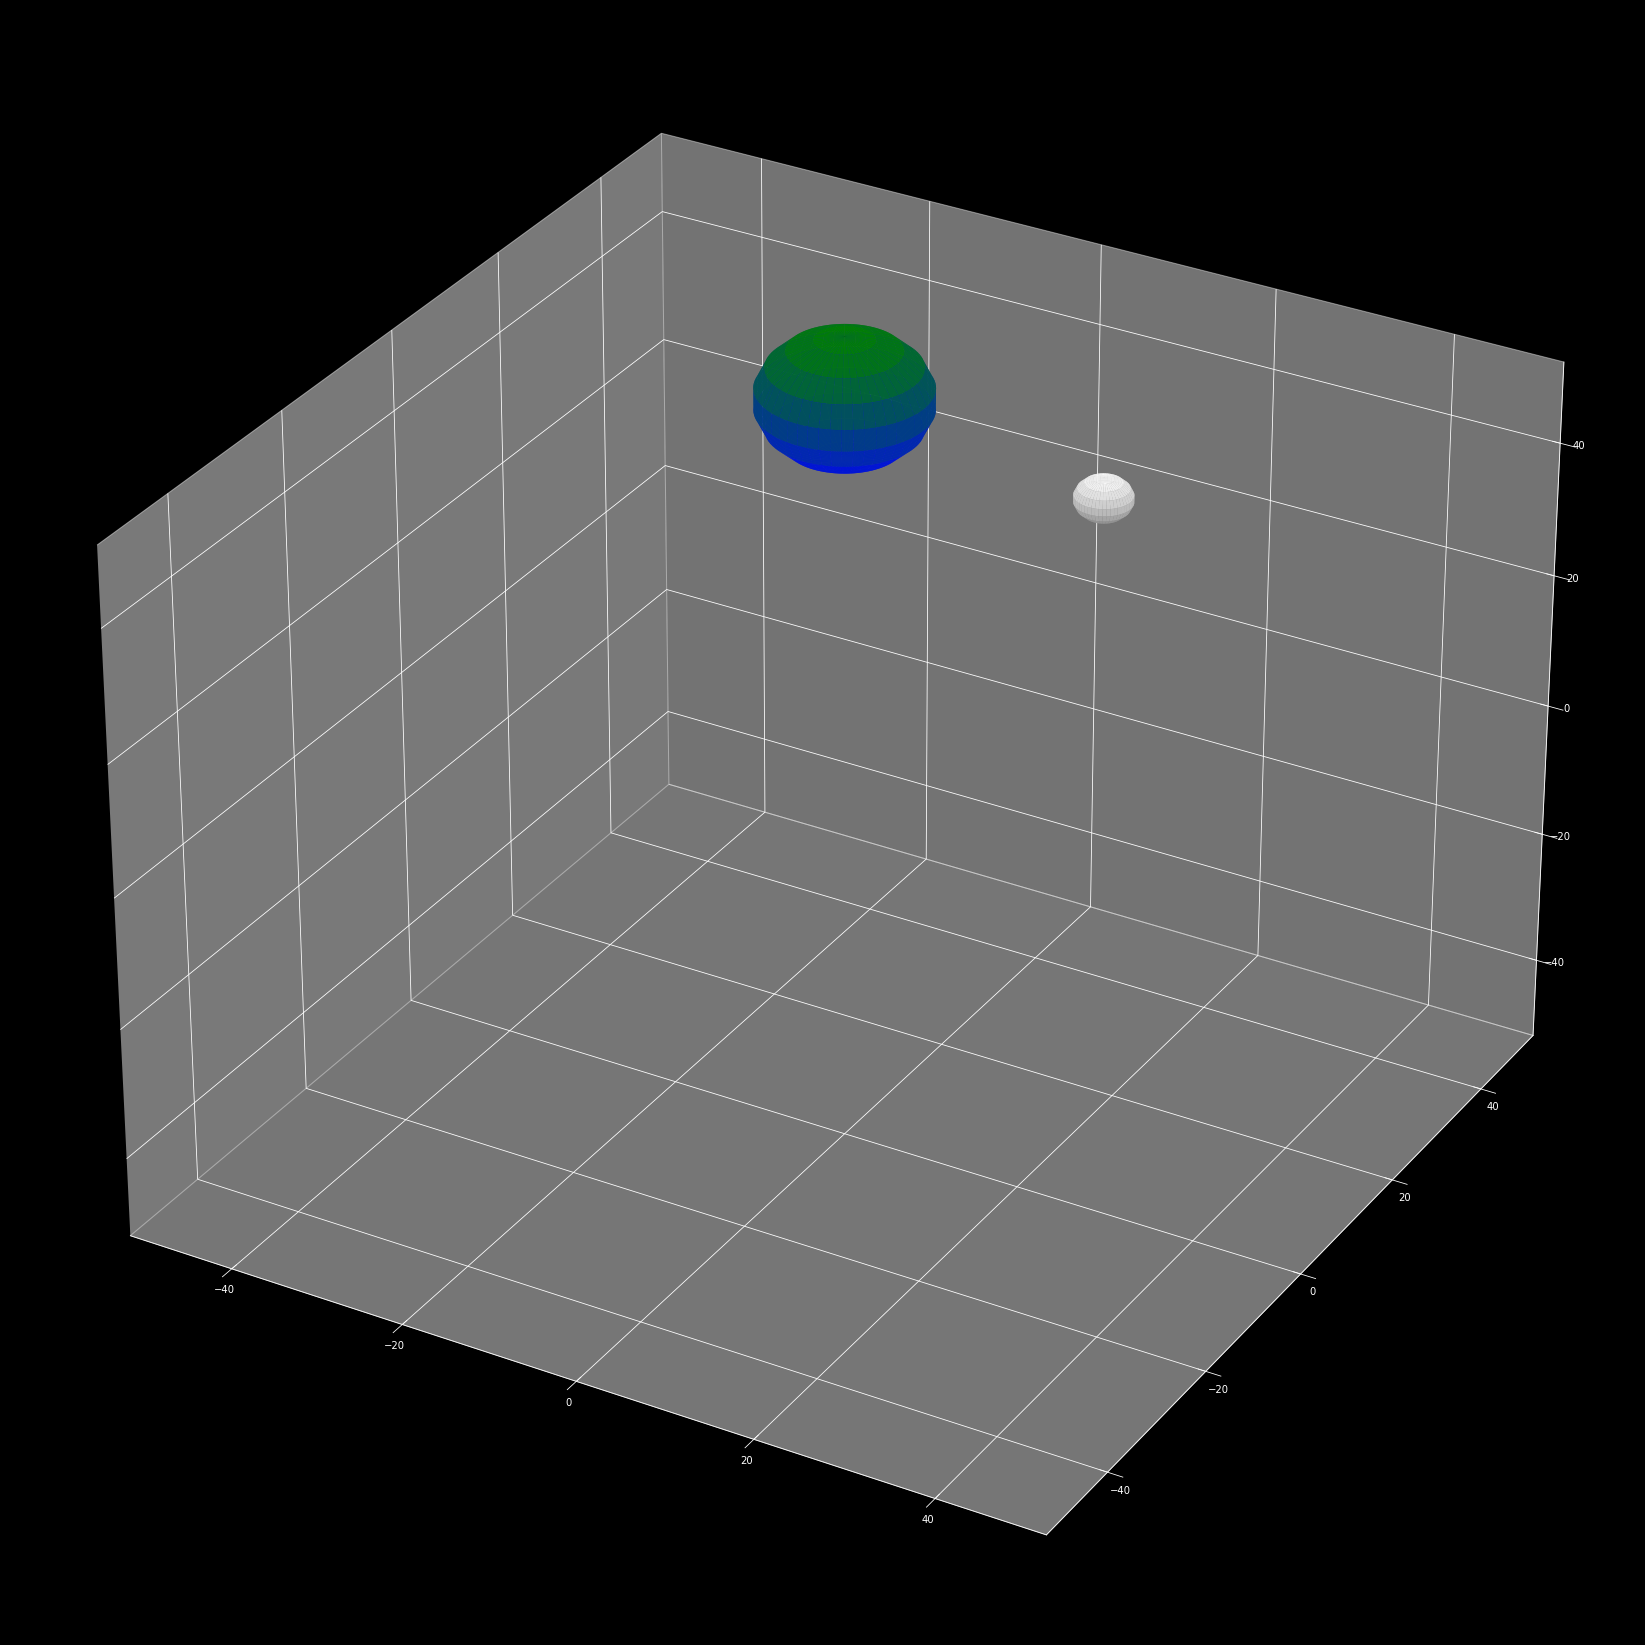

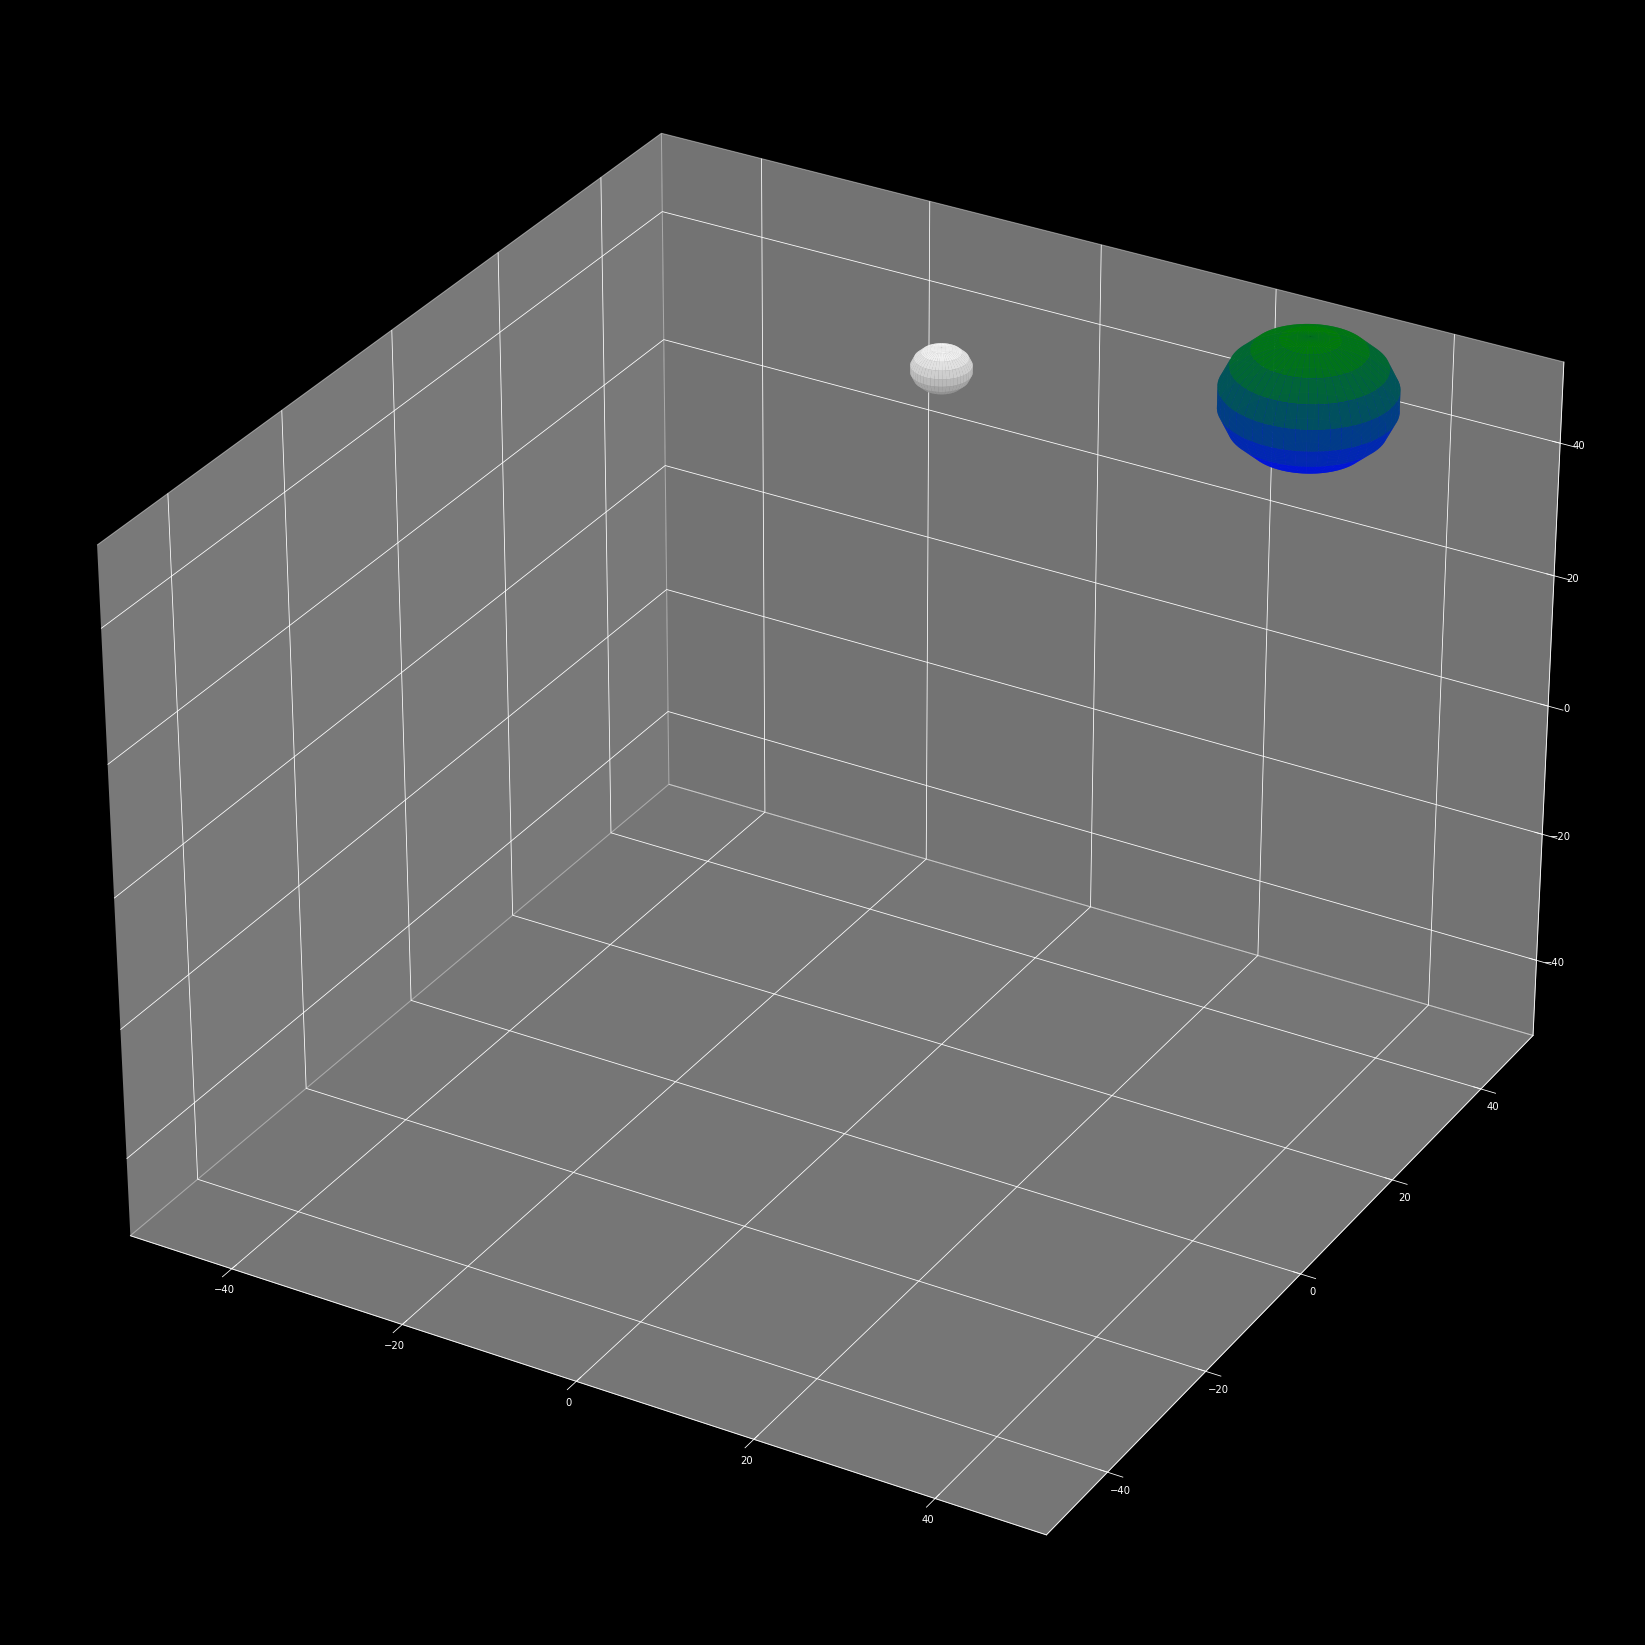

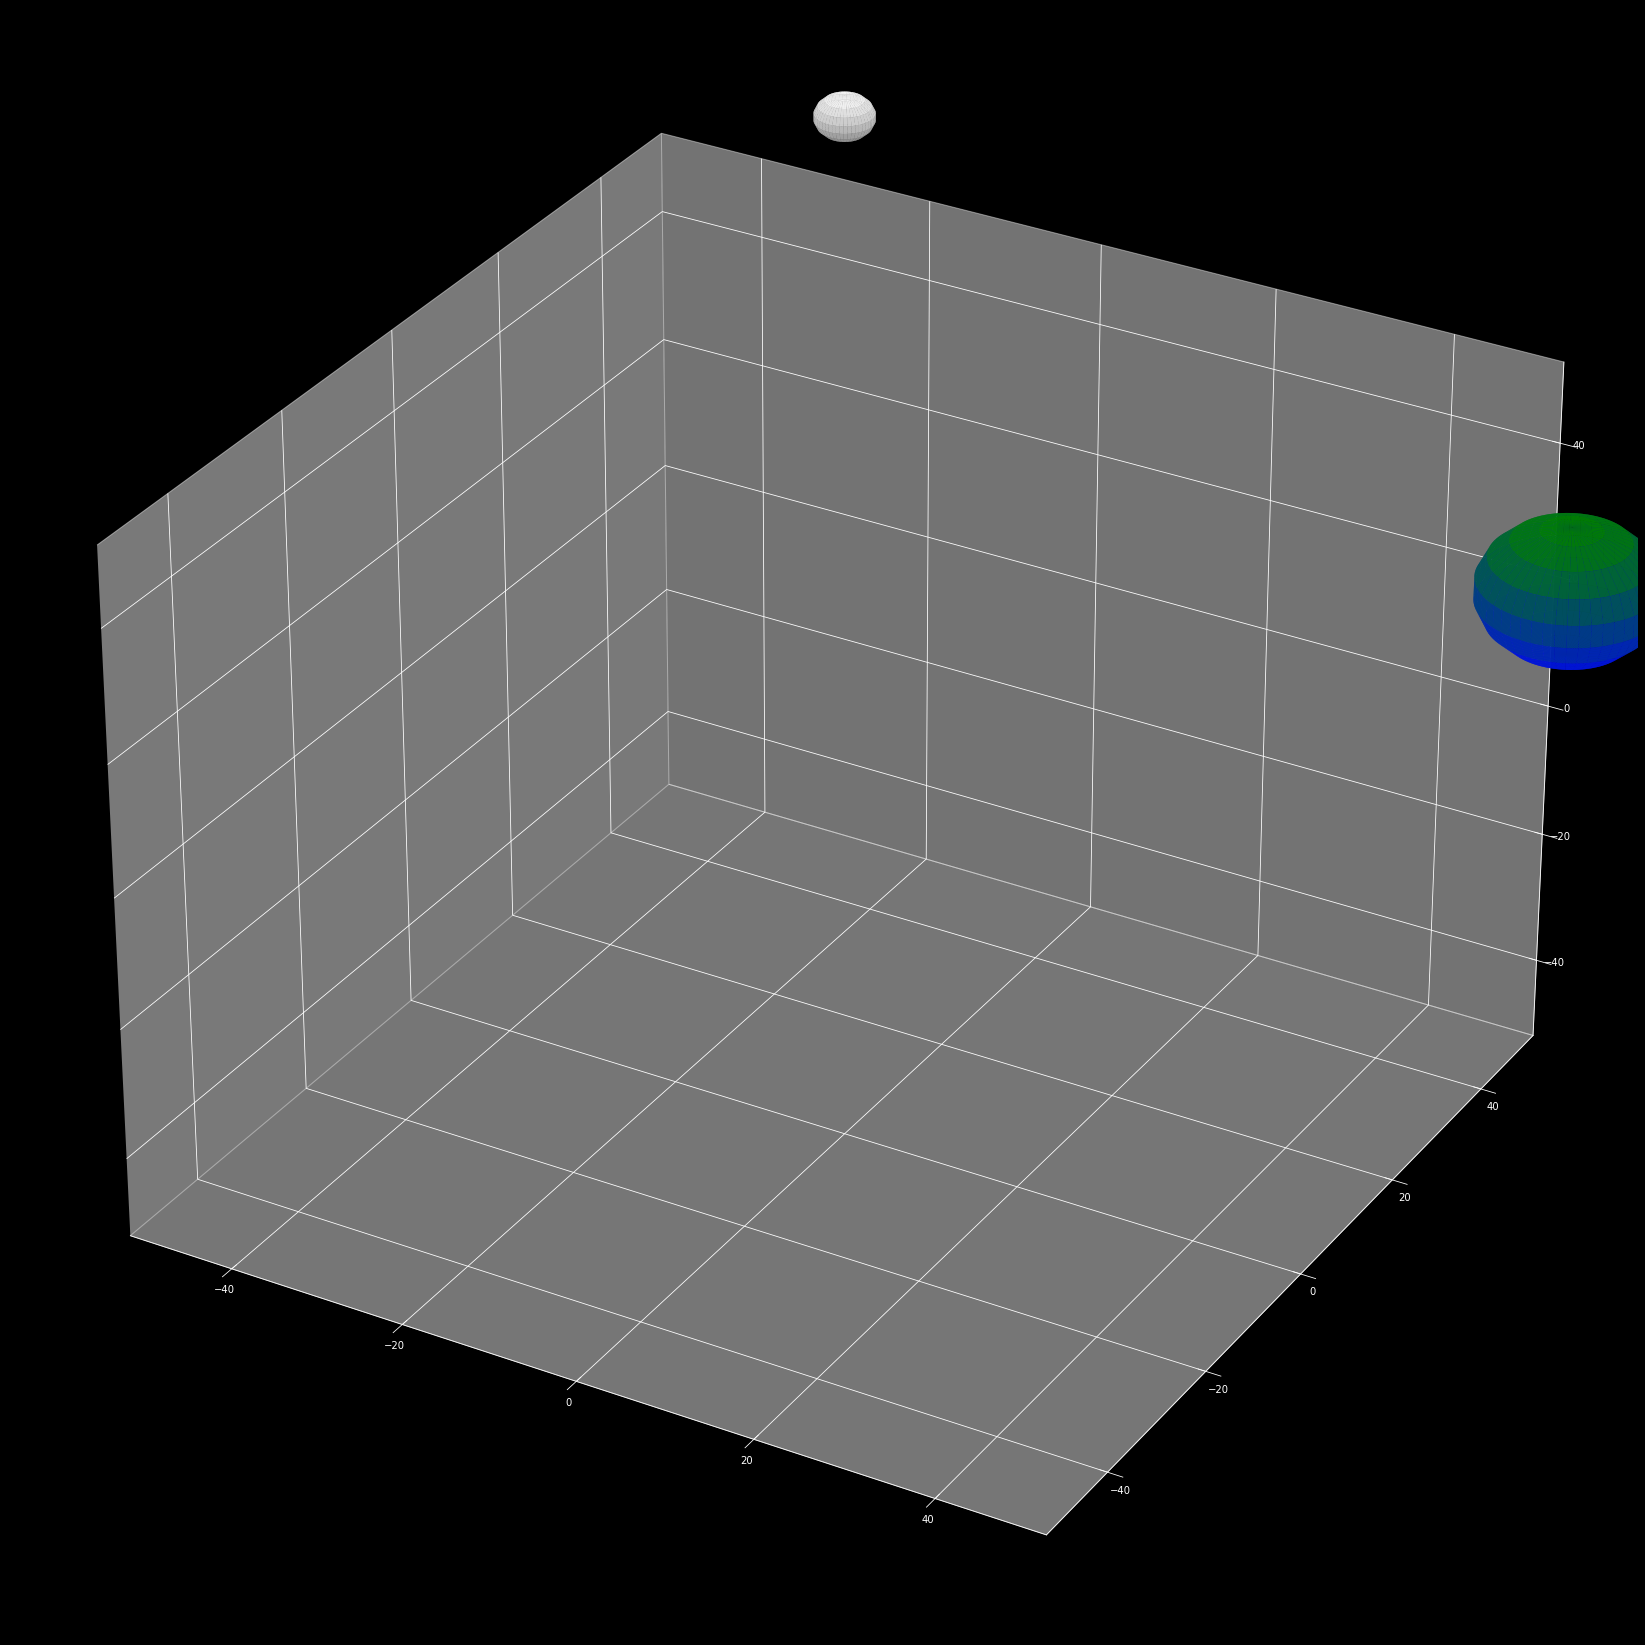

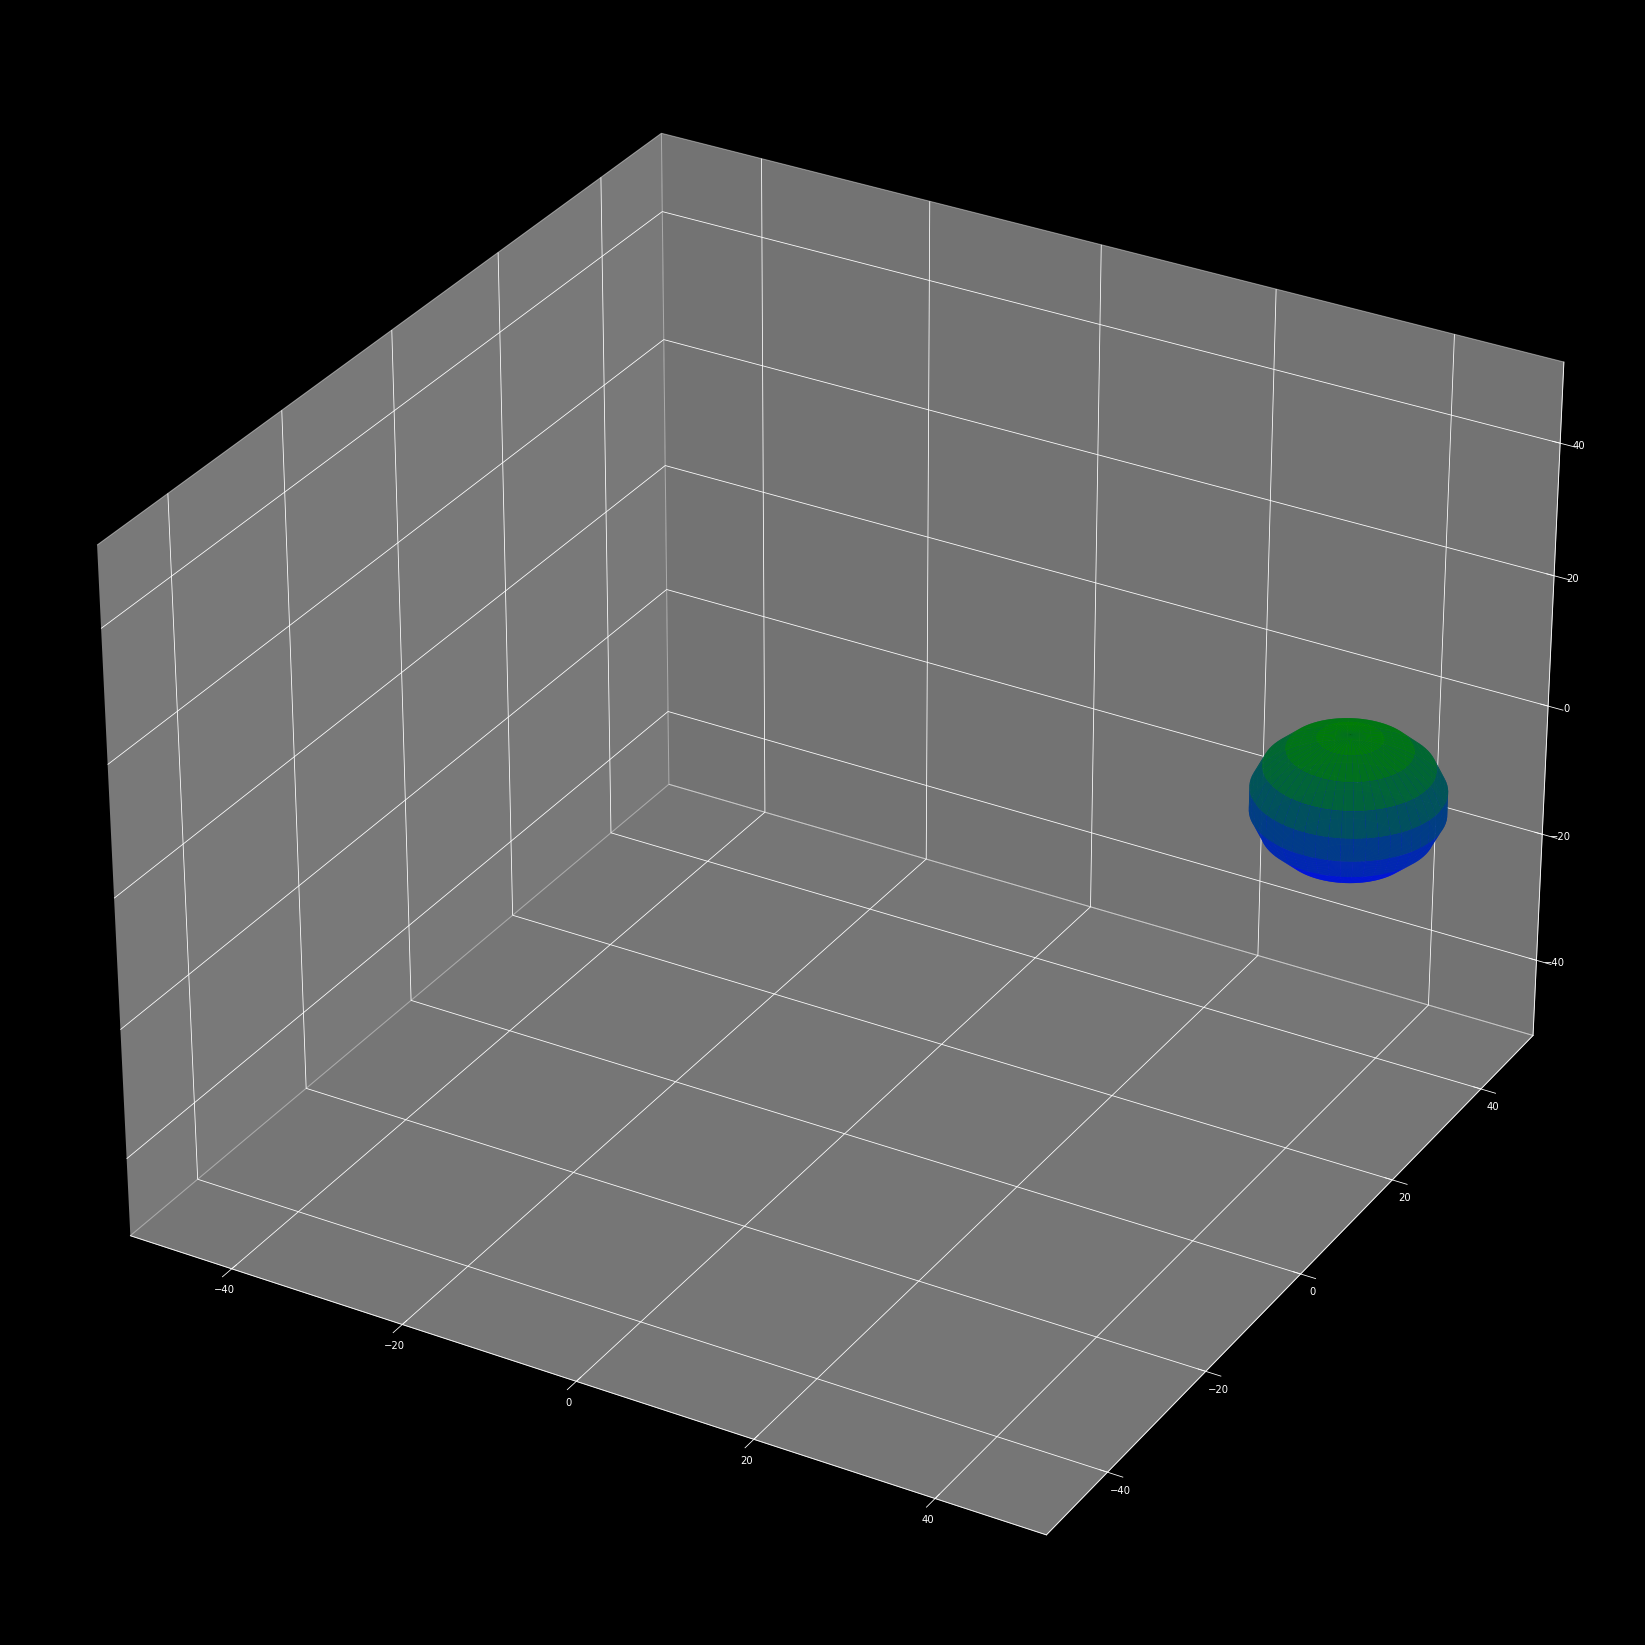

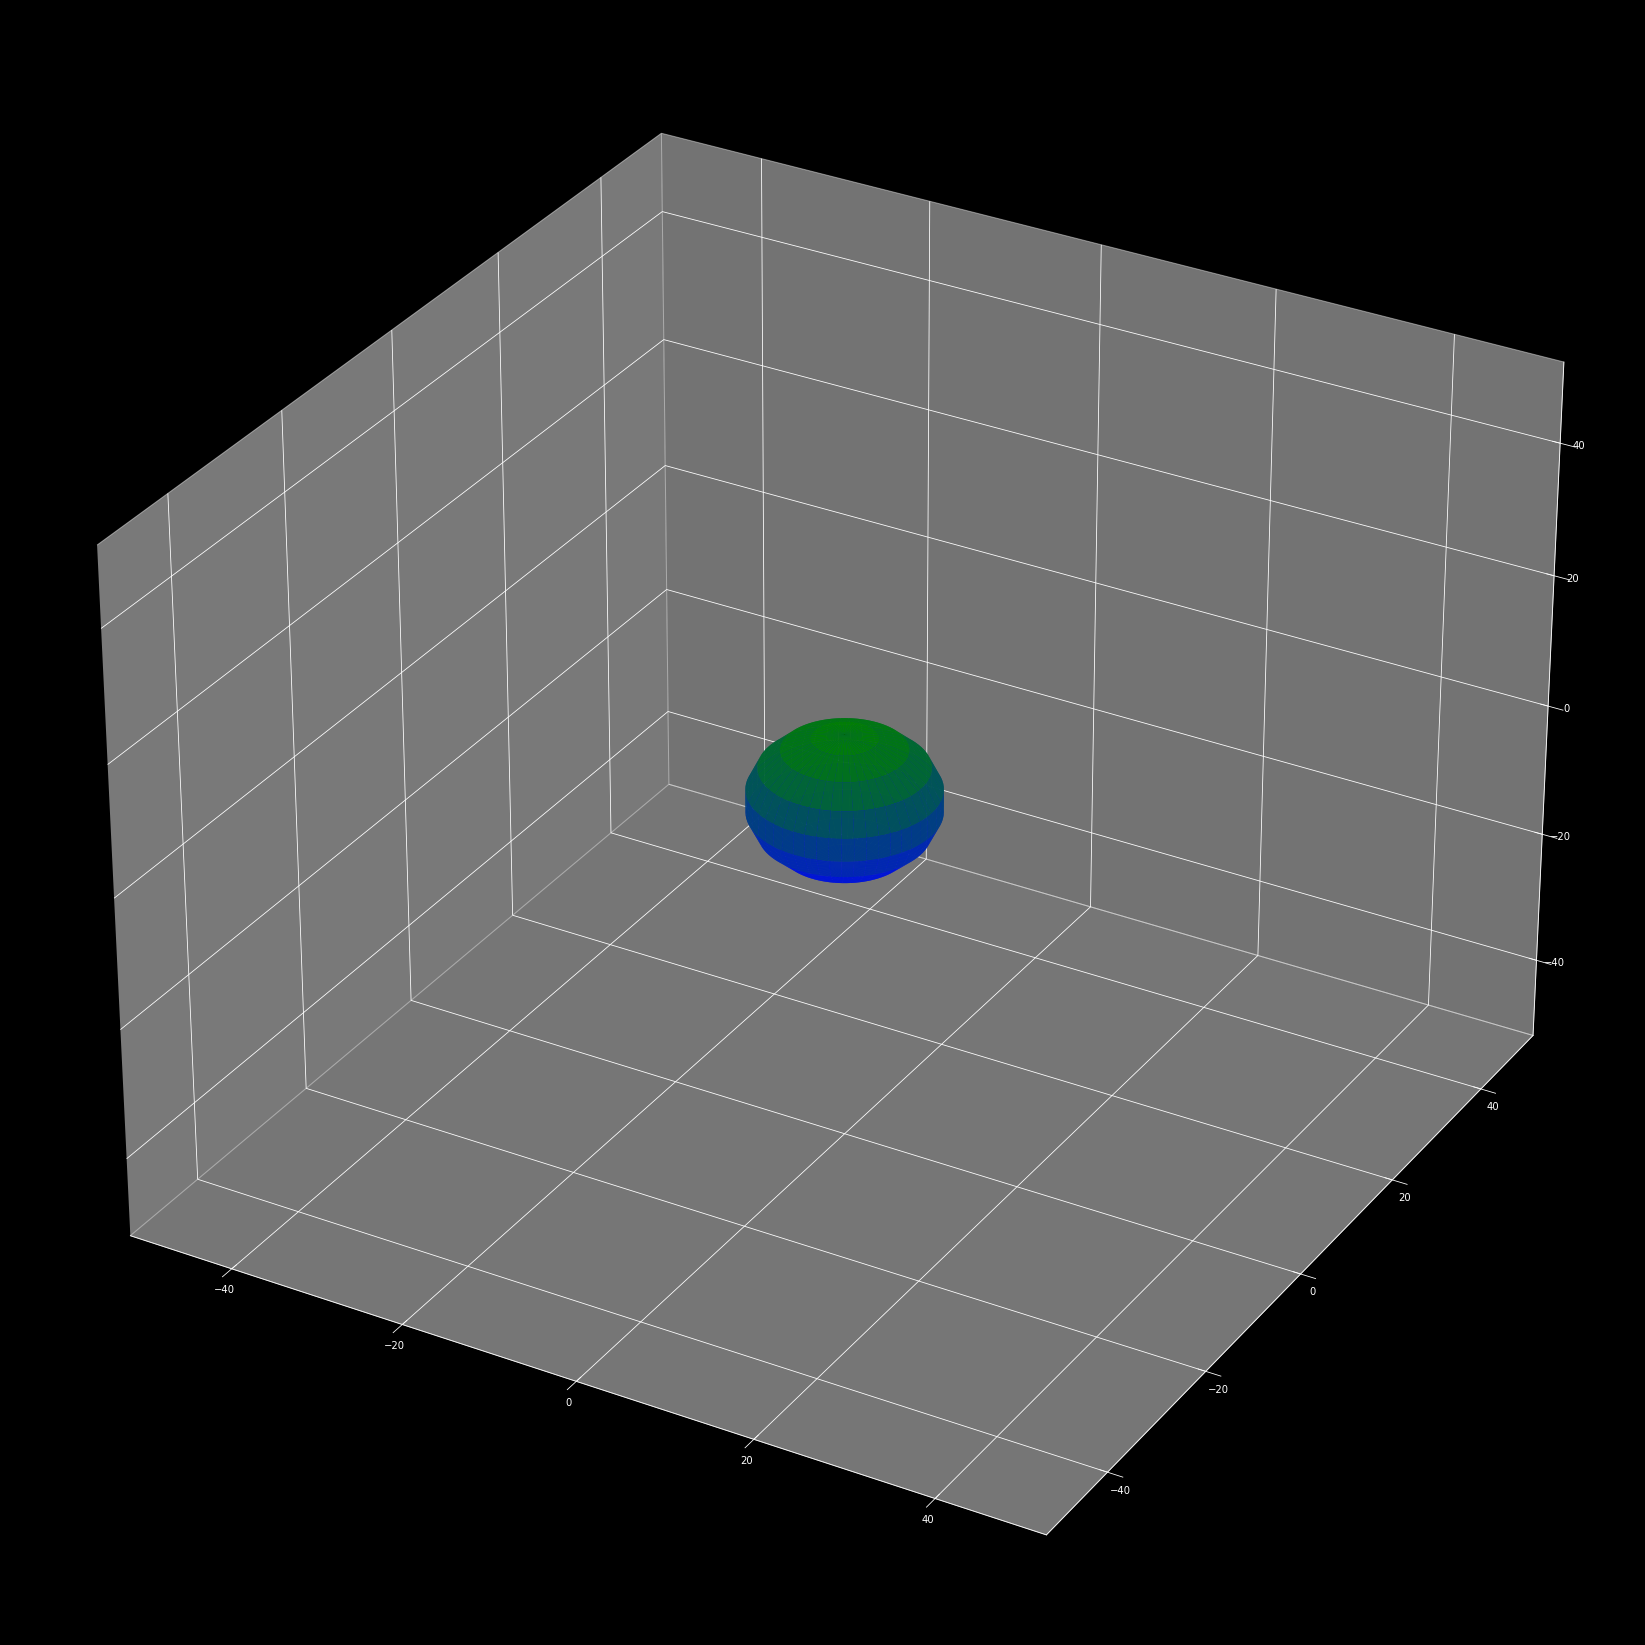

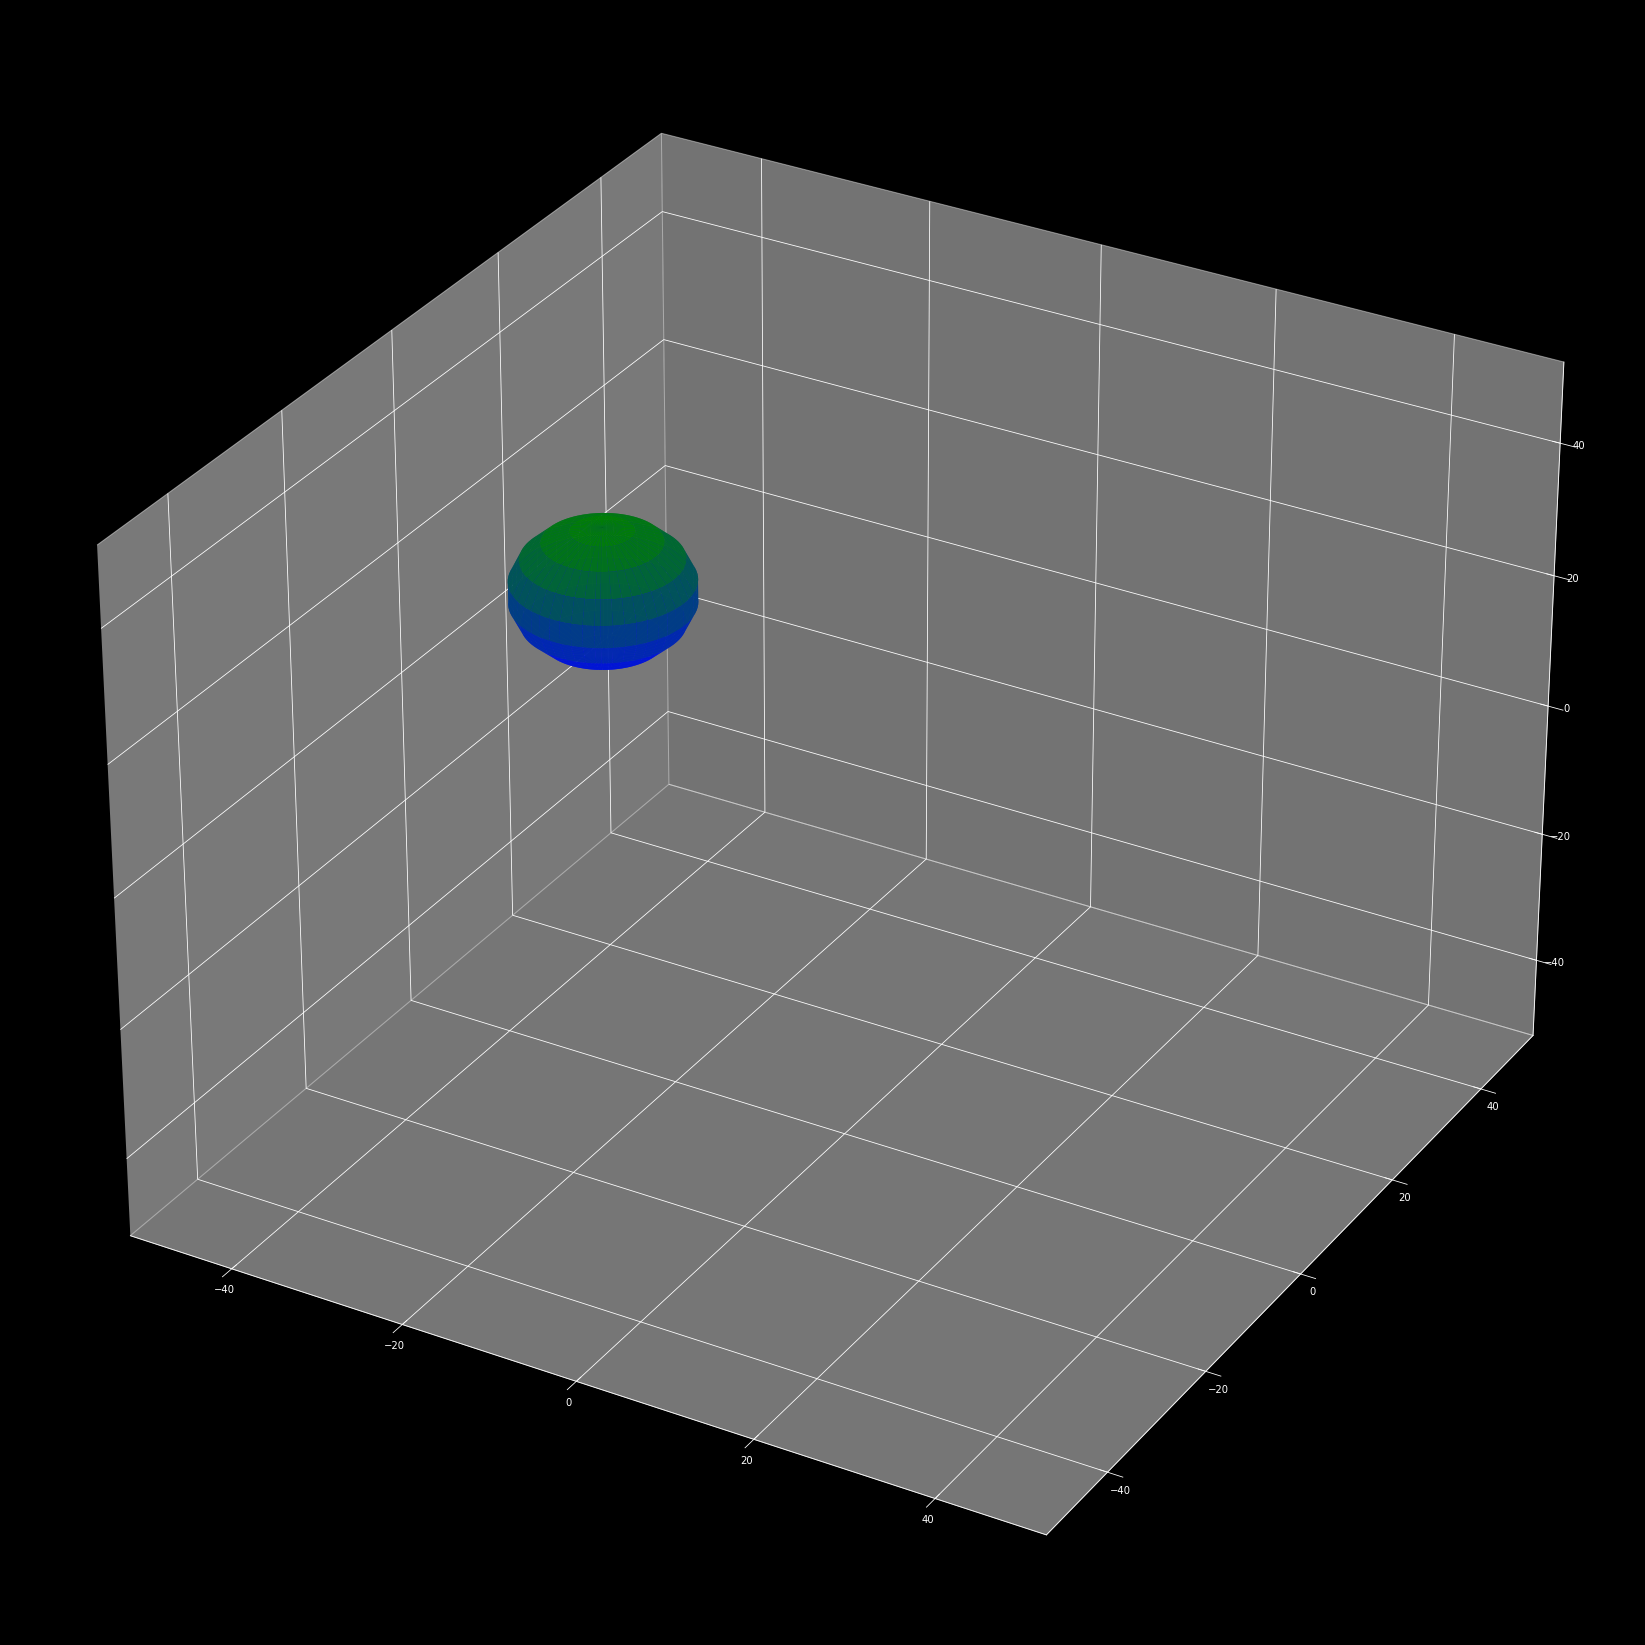

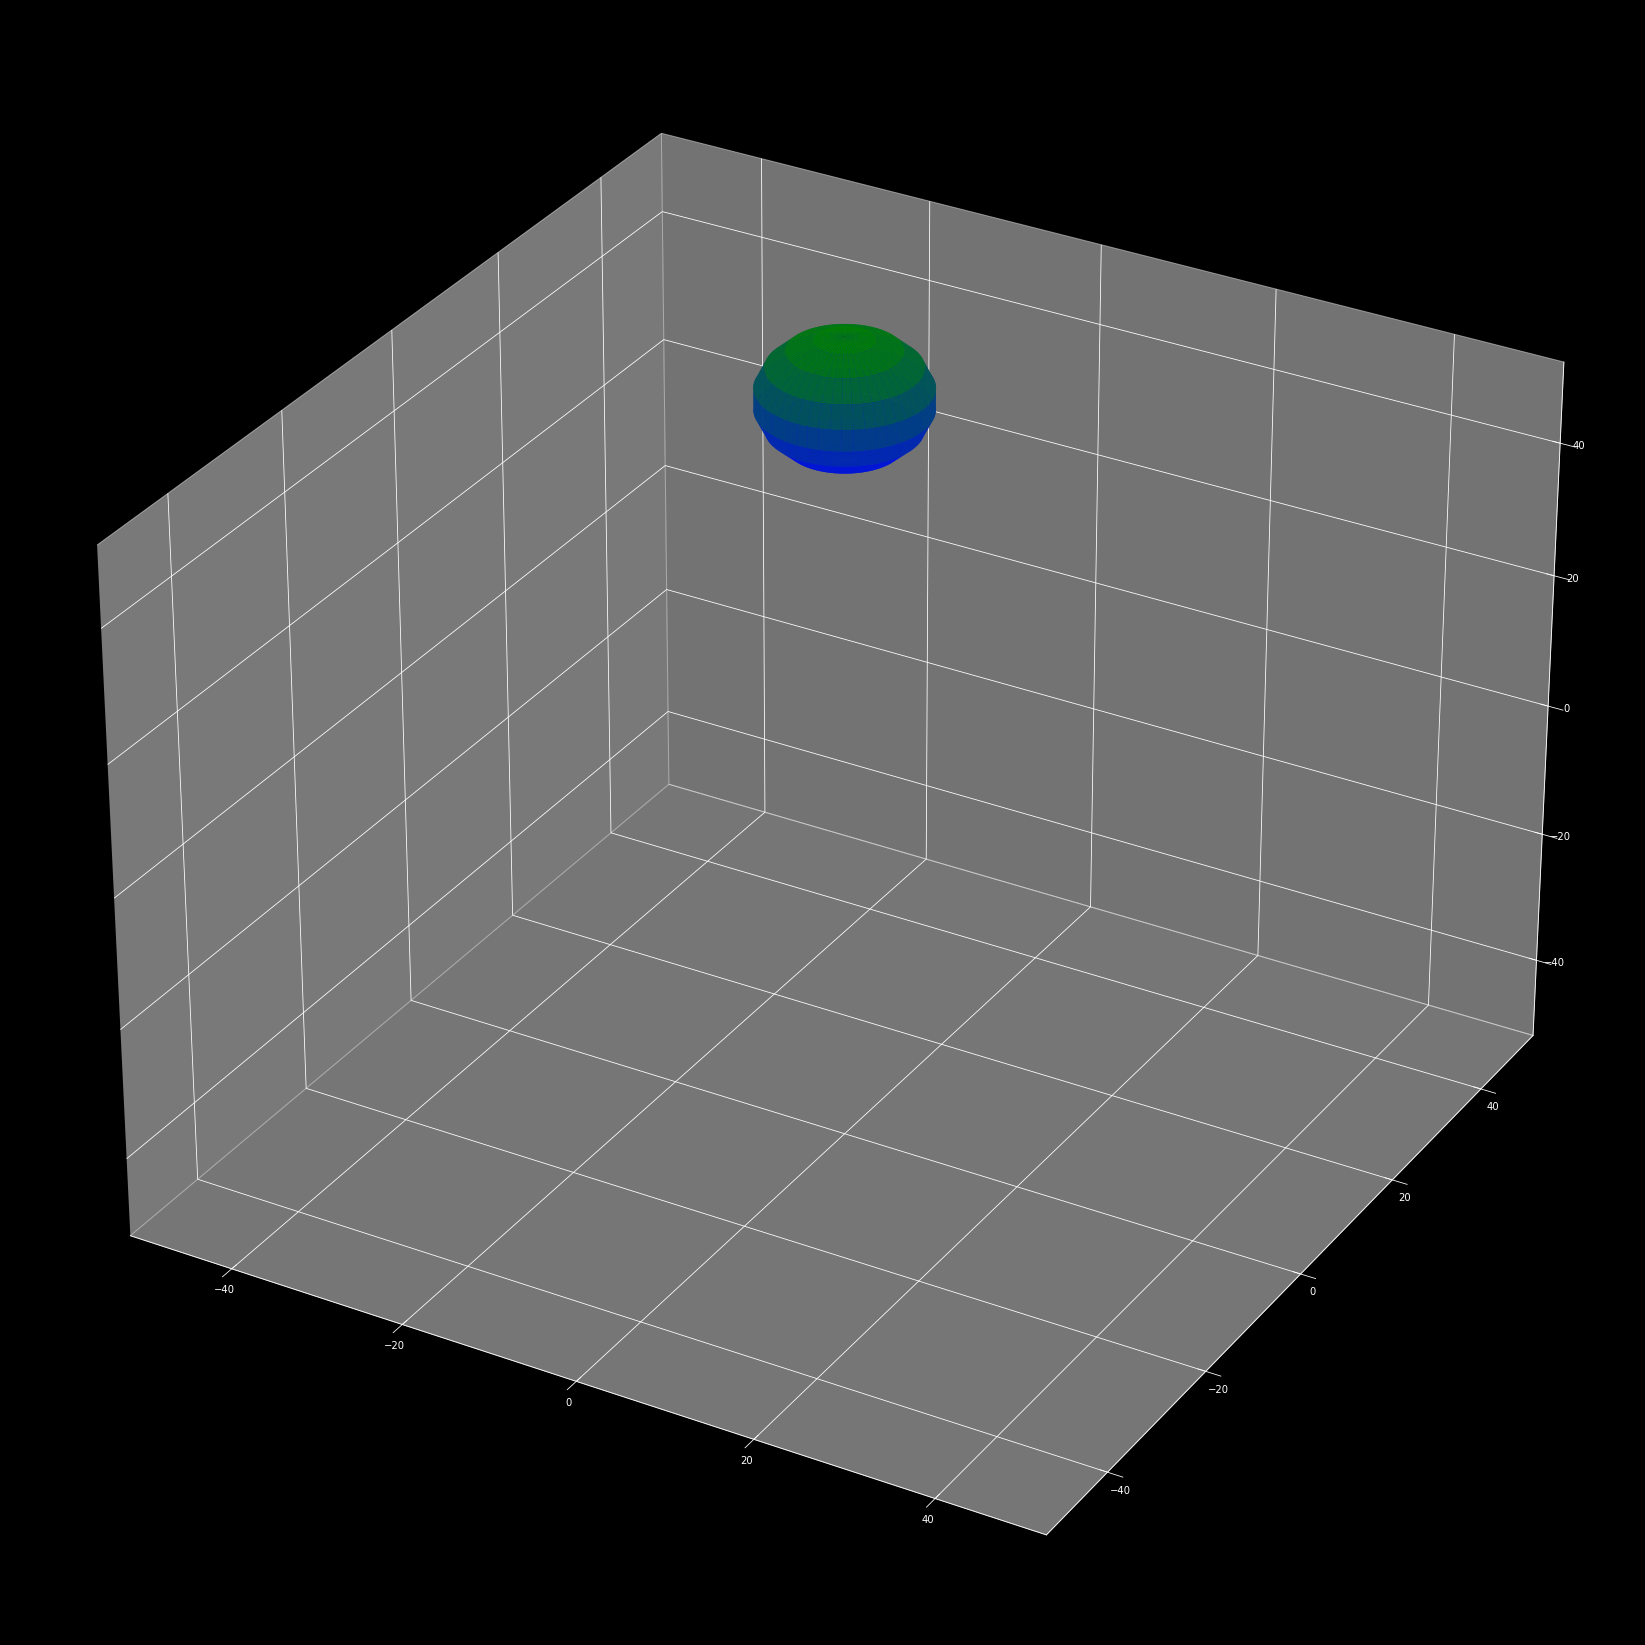

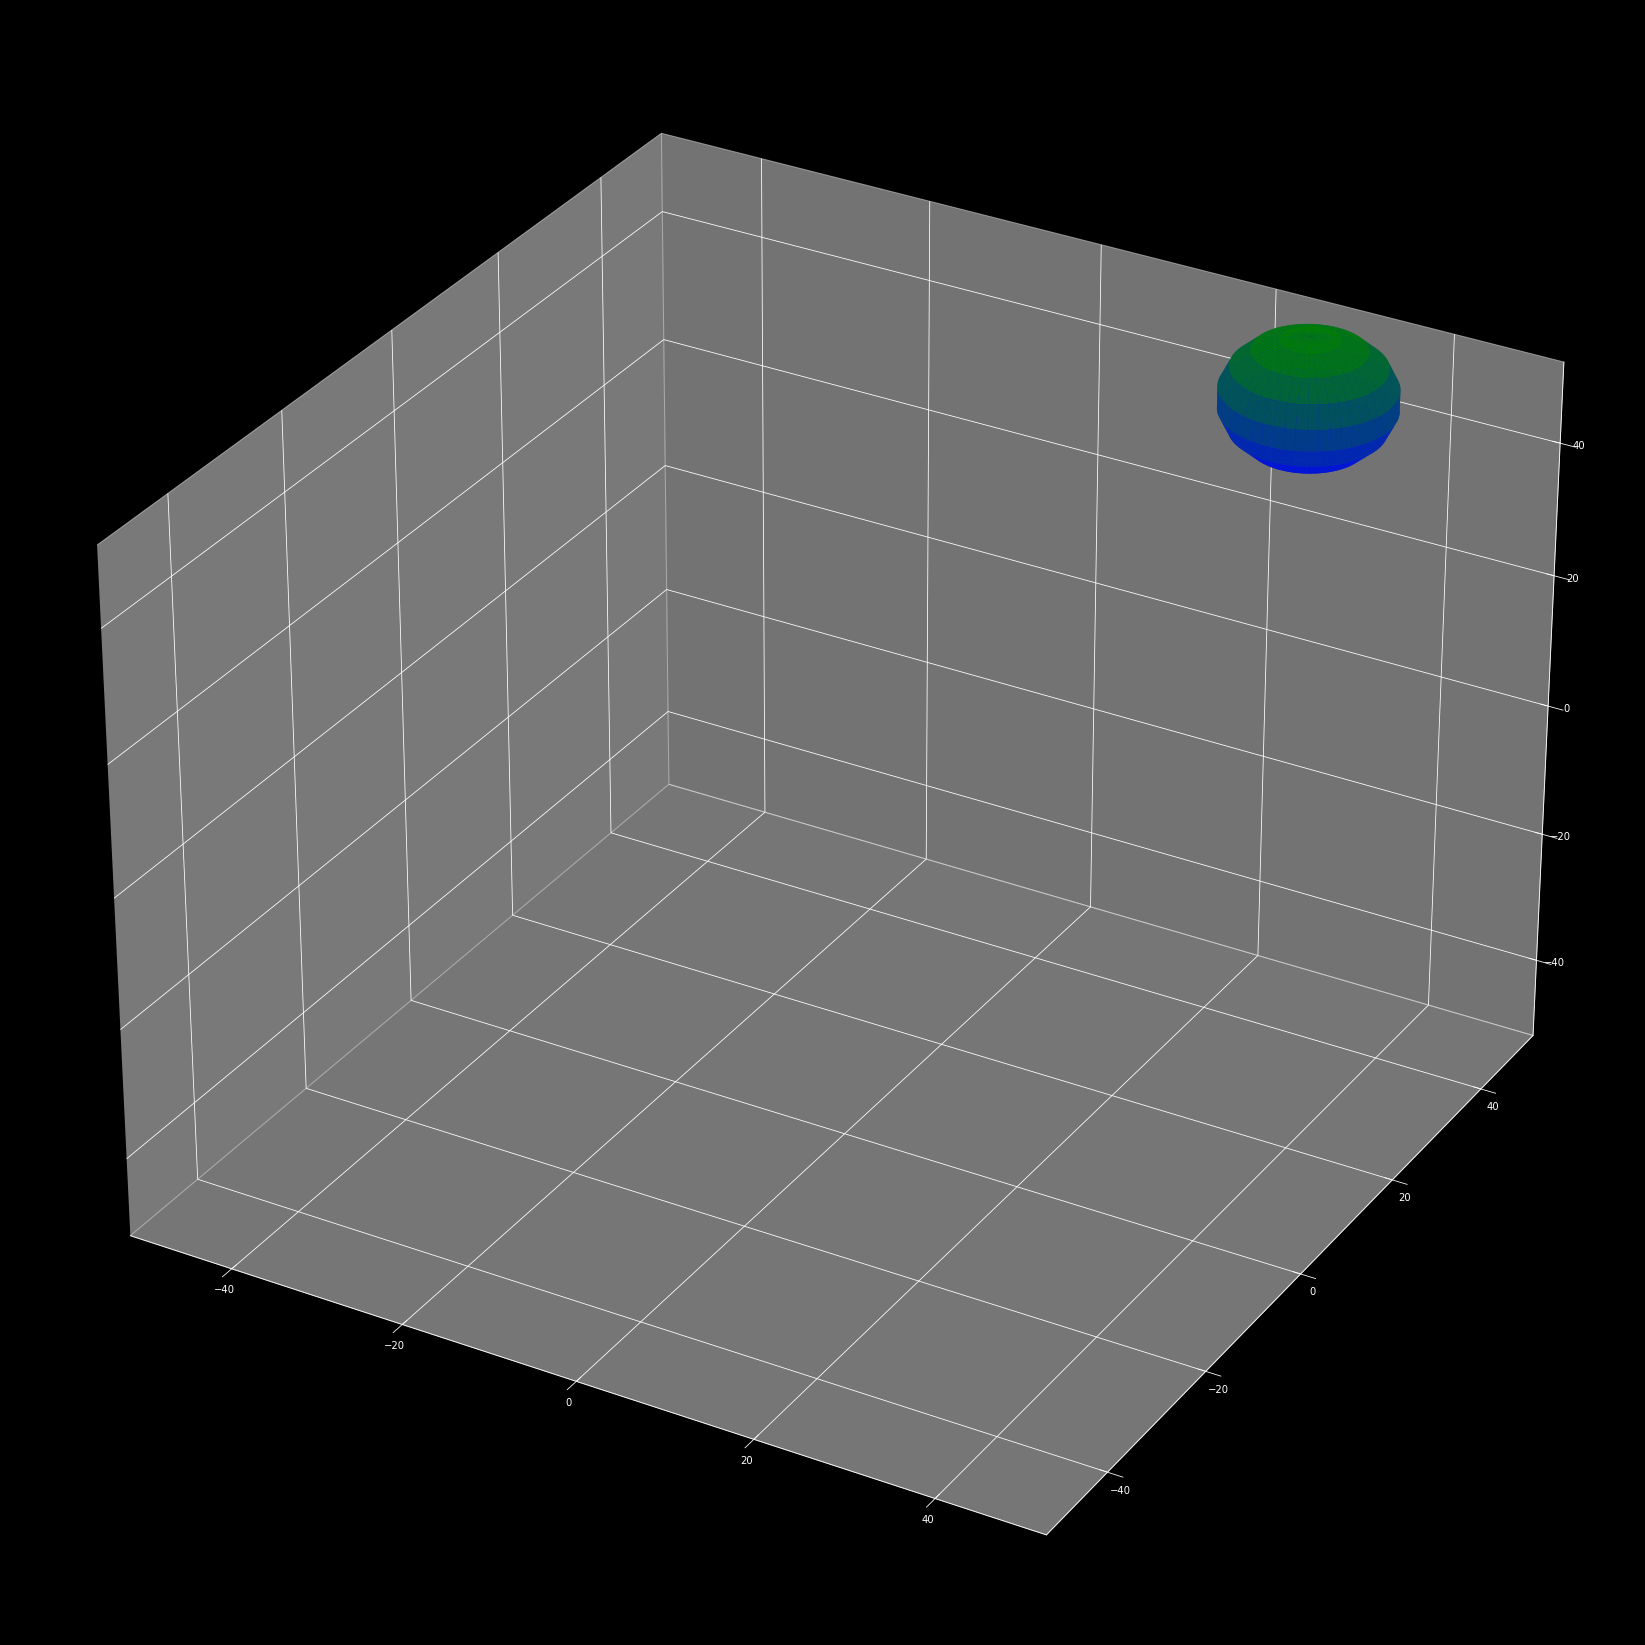

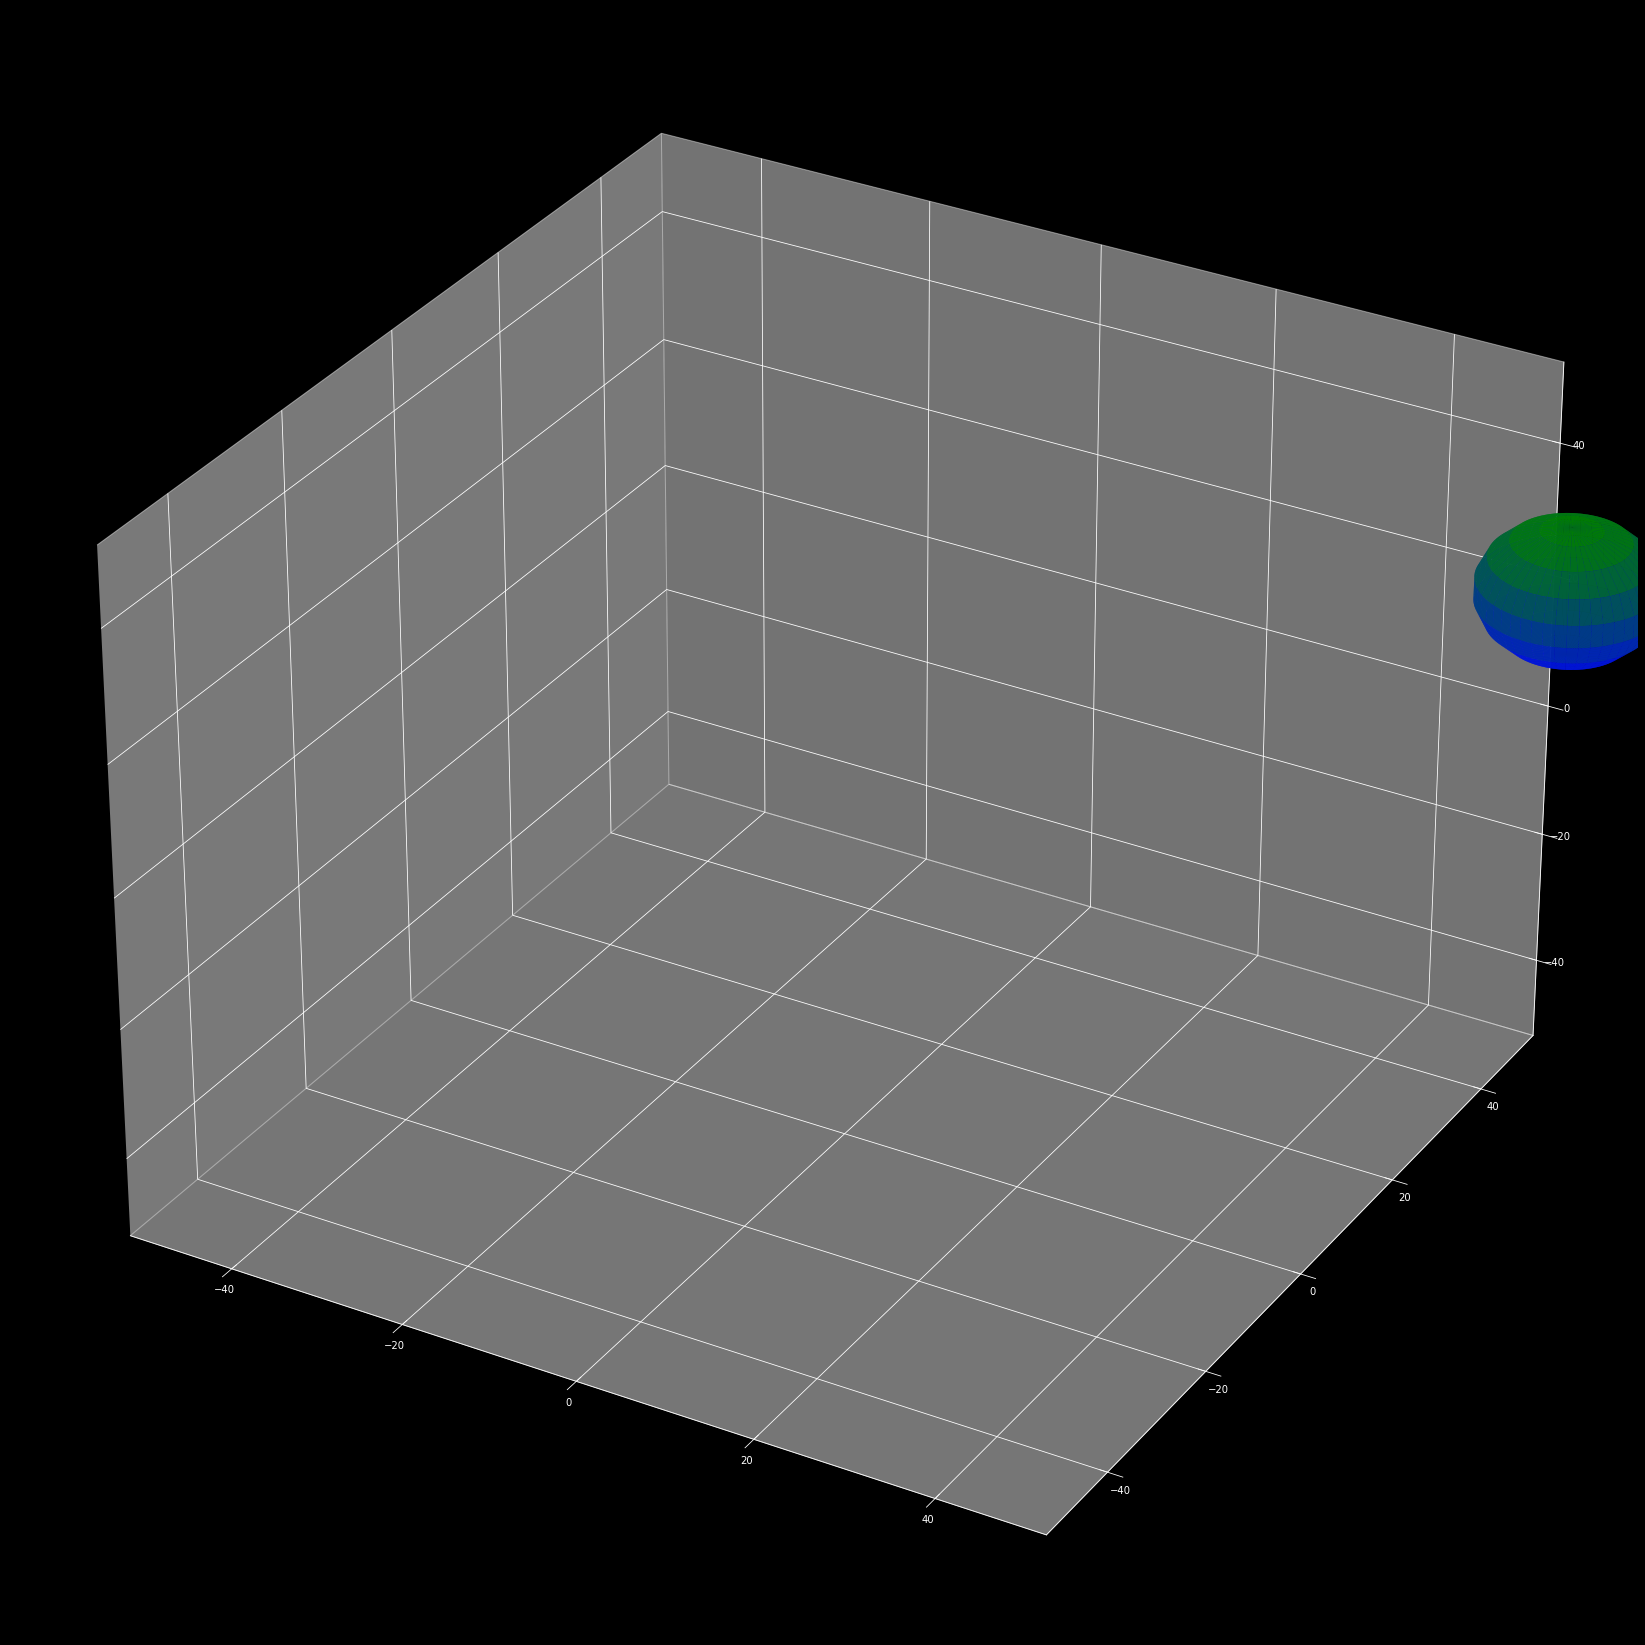

In [41]:
import time 
# plt.style.use('_background')
# Make the X, Y meshgrid.
X,Y,Z = earth()
X2,Y2,Z2 = moon()
# X3,Y3,Z3 = sun()  

# Begin plotting.
wframe = None
tstart = time.time()

P0 = [0,50,1,1]
Tp = np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ -P0[0],-P0[1],-P0[2] , 1]])
Q=60/180*np.pi;
R=[[np.cos(Q), -np.sin(Q), 0,0],[np.sin(Q), np.cos(Q), 0,0],[0, 0, 1,0],[0,0,0,1]]
TR = np.dot(Tp,R)
Tp = np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ P0[0],P0[1],P0[2] , 1]])
TR = np.dot(TR,Tp)
# XYZ = np.hstack((X.reshape(-1,1),Y.reshape(-1,1),Z.reshape(-1,1),np.ones((X.size,1))))

print(TR)

P1 = [0,50,1,1]
Tp = np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ -P1[0],-P1[1],-P1[2] , 1]])
Q=30/180*np.pi;
R=[[np.cos(Q), -np.sin(Q), 0,0],[np.sin(Q), np.cos(Q), 0,0],[0, 0, 1,0],[0,0,0,1]]

TR1 = np.dot(Tp,R)
Tp = np.array([[1, 0, 0,0],[0 ,1 ,0,0],[0,0,1,0],[ P1[0],P1[1],P1[2] , 1]])
TR1 = np.dot(TR1,Tp)
# TR2 = np.dot(TR1,TR)
print(TR2)

XYZ = np.hstack((X.reshape(-1,1),Y.reshape(-1,1),Z.reshape(-1,1),np.ones((X.size,1))))
XYZ_moon = np.hstack((X2.reshape(-1,1),Y2.reshape(-1,1),Z2.reshape(-1,1),np.ones((X2.size,1))))



# print(XYZ.shape)
# print(XYZ)

for phi in range(10):#np.linspace(0, 180. / np.pi, 100):
#     axes.view_init(30, 90)
    fig = plt.figure(figsize = (30,30))
    axes = fig.add_subplot(projection='3d')
    axes.set_xlim(-50, 50)
    axes.set_ylim(-50, 50)
    axes.set_zlim(-50, 50)
    XYZ = XYZ.dot(TR)
    XYZ_moon = XYZ_moon.dot(TR2)
    # If a line collection is already remove it before drawing.
    if wframe:
        wframe.remove()
    # Generate data.
    # Plot the new wireframe and pause briefly before continuing.
    
    cmap_moon = LinearSegmentedColormap.from_list ('gray', ['gray', 'white'], 256) #градиентная палитра цвета 256 level
    axes.plot_surface(XYZ_moon[:,0].reshape(-1,10), XYZ_moon[:,1].reshape(-1,10), XYZ_moon[:,2].reshape(-1,10),color='#11aa55', cmap=cmap_moon, alpha = 0.9) # цвет градиент, но почти нет прозрачности alpha = 0.9

    cmap = LinearSegmentedColormap.from_list ('blue_green', ['b', 'g'], 256) 
    axes.plot_surface(XYZ[:,0].reshape(-1,10), XYZ[:,1].reshape(-1,10), XYZ[:,2].reshape(-1,10),color='#11aa55', cmap=cmap, alpha = 0.9)
#     #plt.pause(.001)
    #plt.show()
    plt.savefig('filename'+str(phi)+'.png')

# print(XYZ)
